# I. Perkenalan


**Identity**

Wirawan Setio Aji <br>
BATCH-14 

**Dataset**

Dataset Ini diperoleh dari [kaggle](https://www.kaggle.com/datasets/aditya2803/premier-league-team-data?select=Shooting+Stats.csv)


- **result**: hasil menang kalah.
- **formation**: Formasi Line up/tatanan baris pemain.
- **team**: klub sepakbola yang ditinjau.
- **opponent**: lawan dari klub sepakbola yang ditinjau.
- **venue**: lapangan diadakan laga kandang / tandang.
- **date**: tanggal diadakan laga.
- **pass_live**: umpan dari set_play, atau serangkaian permainan yang biasanya umpan dimulai dari goal keeper / deffender.
- **pass_dead_shot** : keterlibatan tendangan ke gawang dengan Umpan bola mati, dimana selalu dari tendangan bebas dan tendangan sudut.
- **pass_prog_shot** : keterlibatan tendangan ke gawang dengan umpan progresif, merupakan umpan yang sifatnya mendekati gawang lawan.
- **pass_prg_dist** : jumlah jarak umpan progresif, dihitung dari pemberi umpan hingga ke penerima umpan.
- **pass_tot_dist** : jumlah jarak umpan secara umum, ihitung dari pemberi umpan hingga ke penerima umpan.
- **pass** : jumlah umpan yang berhasil.
- **ground** : tinggi umpan tepat di permukaan lapangan.
- **low** : tinggi umpan dibawah bahu.
- **high** : tinggi umpan diatas bahu.
- **drib**: complete dribling, adalah serangkaian aksi menggiring bola dari 1 pemain hinggia pemain tersebut melakukan umpan / tendangan ke gawang.
- **carries** : adalah banyak sentuhan ketika 1 pemain melakukan dribling.
- **carr_tot_dist** : total jarak pergerakan bola ketika pemain menggiring bola.
- **carr_prg_dist** : total jarak pergerakan bola ketika pemain menggiring bola yang mendekati gawang lawan.
- **pk**: tendangan penalti.
- **fk**: tendangan bebas.
- **press**: jumlah aksi pemain melakukan tekanan terhadap pemain lawan.
- **press_succ**: ketika pemain melakukan tekanan, team yang ditinjau berhasil merebut bola tersebut.

semua yang bersangkutan dengan jarak menggunakan satuan **Yard**


**Objective**<br>
membuat *Clustering* terhadap data **pola menyerang** dari setiap klub sepakbola Liga Inggris *Premier League*. Dan menganalisa label hasil dari clustering. Dikarenakan Sepakbola yang bagus adalah sepak bola yang memiliki pola yang jelas

# II. Import Libraries

Seluruh *Library* untuk menunjang pengerjaan proyek 

In [1]:
import pandas as pd # Data flow
pd.set_option("display.max.columns",None) # display all columns
import numpy as np # algebra linear
%load_ext autoreload

%autoreload 2
# Data Visual
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter


#Preprocessing
from sklearn.model_selection import train_test_split# split train test and train set
from sklearn.preprocessing import MinMaxScaler # feature scalling MinMaxScaler
from sklearn.decomposition import PCA # for feature reduction
# Math Modelling
from sklearn.cluster import KMeans,SpectralClustering,DBSCAN # K Means clustering algorithm 
from sklearn.mixture import GaussianMixture # Gaussian Mixture clustering
# dimensional reduction 

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Evaluation Model 
from sklearn.metrics import silhouette_score
 # outliers sencoring
from outliermod import skewness,outliersCheck,outlier_graph,censoring_outliers

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

#Export model 
import pickle


# III. Data Loading
Sebelum Melakukan **Data Explore**, muat data pada dataframe dan **mempelajari** secara umum tentang **tipe data**, **konteks setiap kolom** pada data yang diperoleh

In [2]:
# load Uber and lyft data into 'data' 
df_epl = pd.read_csv('./football_pattern.csv') # ,na_values=[' ?','?']
df_epl

,Unnamed: 0,result,formation,team,opponent,venue,date,pass_live_shot,pass_dead_shot,drib_shot,pk,fk,pass_prog,pass_prg_dist,pass_tot_dist,pass,ground,low,high,carries,carr_tot_dist,carr_prg_dist,carr_att_3rd,att_pen,press,press_succ
0,0,W,3-4-3,Arsenal,Leicester City,Home,2017-08-11,39,4,2,0,0,36,2100,6264,319,513,30,116,360,2289,1154,109,16,474,126
1,1,L,3-4-3,Arsenal,Stoke City,Away,2017-08-19,22,2,0,0,0,36,2304,7285,351,611,24,110,380,2014,956,118,22,152,46
2,2,L,3-4-3,Arsenal,Liverpool,Away,2017-08-27,8,1,1,0,1,50,3193,8722,473,395,49,110,512,2976,1700,200,25,430,120
3,3,W,3-4-3,Arsenal,Bournemouth,Home,2017-09-09,23,0,1,0,0,65,3543,10863,546,449,29,136,583,2305,1064,227,41,312,96
4,4,D,3-4-3,Arsenal,Chelsea,Away,2017-09-17,12,0,1,0,1,50,3192,10302,533,351,29,152,526,2955,1355,177,25,374,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,2275,L,3-4-3,Wolves,Sheffield Utd,Away,2020-07-08,18,3,3,0,3,93,8787,29691,1407,996,345,414,1236,8304,4653,399,42,122,43
2276,2276,W,3-4-3,Wolves,Everton,Home,2020-07-12,36,6,9,3,0,117,9015,32103,1530,1287,225,270,1368,7923,4656,453,48,144,22
2277,2277,D,3-4-3,Wolves,Burnley,Away,2020-07-15,39,6,12,0,0,120,7167,21924,1026,687,261,420,912,6159,3894,441,66,121,39
2278,2278,W,3-4-3,Wolves,Crystal Palace,Home,2020-07-20,33,6,6,0,0,87,8358,25200,1197,822,225,450,1119,5979,3072,438,57,152,44


## Dataframe Info

melihat dimensi pada dataframe dan kelengkapan nilai data

In [3]:
df_epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2280 non-null   int64 
 1   result          2280 non-null   object
 2   formation       2280 non-null   object
 3   team            2280 non-null   object
 4   opponent        2280 non-null   object
 5   venue           2280 non-null   object
 6   date            2280 non-null   object
 7   pass_live_shot  2280 non-null   int64 
 8   pass_dead_shot  2280 non-null   int64 
 9   drib_shot       2280 non-null   int64 
 10  pk              2280 non-null   int64 
 11  fk              2280 non-null   int64 
 12  pass_prog       2280 non-null   int64 
 13  pass_prg_dist   2280 non-null   int64 
 14  pass_tot_dist   2280 non-null   int64 
 15  pass            2280 non-null   int64 
 16  ground          2280 non-null   int64 
 17  low             2280 non-null   int64 
 18  high    

dataframe memiliki **2280 baris** dan **24 kolom**

Tidak terdapat **missing value** pada data

## Melihat lebih dalam tentang data Numerik dan Kategori

untuk mencari mana data yang sesungguhnya memiliki sifat **kategori** dengan melihat **rasio** antara jumlah ***unique value*** dan jumlah **barisnya**

In [4]:
length = len(df_epl)
list_col = list(df_epl.columns)
list_disc = []
def unique_ratio(df,col,length):
    return len(df[col].unique()) / length

for col in list_col:
    rate = unique_ratio(df_epl,col,length)
    if rate < 0.01:
        list_disc.append(col)
    print("unique ratio " + col +" :",rate)
    

unique ratio Unnamed: 0 : 1.0
unique ratio result : 0.0013157894736842105
unique ratio formation : 0.014035087719298246
unique ratio team : 0.011403508771929825
unique ratio opponent : 0.011403508771929825
unique ratio venue : 0.0008771929824561404
unique ratio date : 0.14385964912280702
unique ratio pass_live_shot : 0.031578947368421054
unique ratio pass_dead_shot : 0.007017543859649123
unique ratio drib_shot : 0.005701754385964913
unique ratio pk : 0.0021929824561403508
unique ratio fk : 0.0035087719298245615
unique ratio pass_prog : 0.06359649122807018
unique ratio pass_prg_dist : 0.7618421052631579
unique ratio pass_tot_dist : 0.918859649122807
unique ratio pass : 0.3706140350877193
unique ratio ground : 0.34078947368421053
unique ratio low : 0.1074561403508772
unique ratio high : 0.11798245614035088
unique ratio carries : 0.36271929824561405
unique ratio carr_tot_dist : 0.7872807017543859
unique ratio carr_prg_dist : 0.6657894736842105
unique ratio carr_att_3rd : 0.205263157894736

In [5]:
list_disc

['result', 'venue', 'pass_dead_shot', 'drib_shot', 'pk', 'fk']

Setelah melihat masing-masing rasio ***Unique Value*** pada setiap kolom, terdapat beberapa 
data numerik yang **tergolong kategori** yaitu pada kolom :

`'pass_dead', 'drib', 'pk'`

## Memperbaiki Nilai Kolom

In [6]:
df_epl['formation'] = df_epl['formation'].replace(['4-4-2â\x97\x86'],'4-4-2')
df_epl['formation'] = df_epl['formation'].replace(['4-3-3â\x97\x86'],'4-3-3')
df_epl['formation'] = df_epl['formation'].replace(['4-2-3-1â\x97\x86'],'4-2-3-1')

# df_epl.query("formation == '4-3-3â\x97\x86'")['formation'] = '4-4-3'
# df_epl.query("formation == '4-2-3-1â\x97\x86'")['formation'] = '4-2-3-1'



# IV. Exploratory Data Analysis

**EDA** Menganalisa untuk mendapatkan insight pada data yang diperoleh

dan pada EDA ini akan dipakai bahasa **Big 6** dalam Liga Inggris, itu adalah sebutan untuk **klub 6 besar** yang konsisten secara **perolehan point dan pemasukan finansial** selama liga inggris berubah nama menjadi **Premier League**. klub tersebut antara lain **Chelsea,Manchester Utd, Manchaster City,Arsenal, Tottenham,Liverpool**

## Progresifitas

Progresifitas adalah **aksi** (umpan/menggiring) pemain untuk **mengantarkan bola menuju gawang lawan**.  Pada awal sepak bola modern, yaitu tahun 2001, **progresifitas** pergerakan bola **mendapat nama buruk**, karena progresifitas yang identik dengan klub tersebut hanya mengandalkan *counter-attack* dimana hanya melakukan **umpan panjang** dari lini bertahan, dan relatif hanya melakukan **parkir bus** atau membiarkan lawan datang menuju pertahanan sendiri secara pasif, sehingga membuat permainan tidak menarik.

Namun ketika **Ralf Rangnick** pada tahun 1984, Mengembangkan permainan direct-high pressure dari **Valeriy Lobanovskyi** dan melahirkan permainan **Gegen Pressing** menurut [wikipedia](https://id.wikipedia.org/wiki/Ralf_Rangnick).

**Gegen Pressing** adalah filosofi sepak bola dimana pada dasarnya membuat **counter-attack** dan **bertahan dengan melakukan tekanan tinggi** pada lawan dimanapun posisi lawan yang membawa bola itu berada. membuat lawan takut melakukan umpan panjang, dan memaksa lawan untuk berbuat kesalahan. gegen pressing sangat efektif jika dapat merebut bola dengan waktu singkat, dan mengumpan akurat menuju pemain terdekat dengan gawang lawan (umpan progresif).

**Awal Ketenaran Gegenpressing** ada pada tahun 2009, dengan menggunakan filosofi gegenpressing dapat **mengalahkan** langgana Juara Bundes Liga **Bayern Munchen** 2x, dan masuk final UCL pada 2013.  

Pada saat **Gegenpressing** naik daun, saat itulah permainan **sepakbola progresif** tidak hanya **counter attack** dan **long ball**, tetapi juga ada variasi lain.

### Ratio Melakukan **Umpan** Progresive

ditinjau dari banyak aksi dan jaran umpan

Text(0.5, 1.0, 'Ratio Jarak Umpan Progresif')

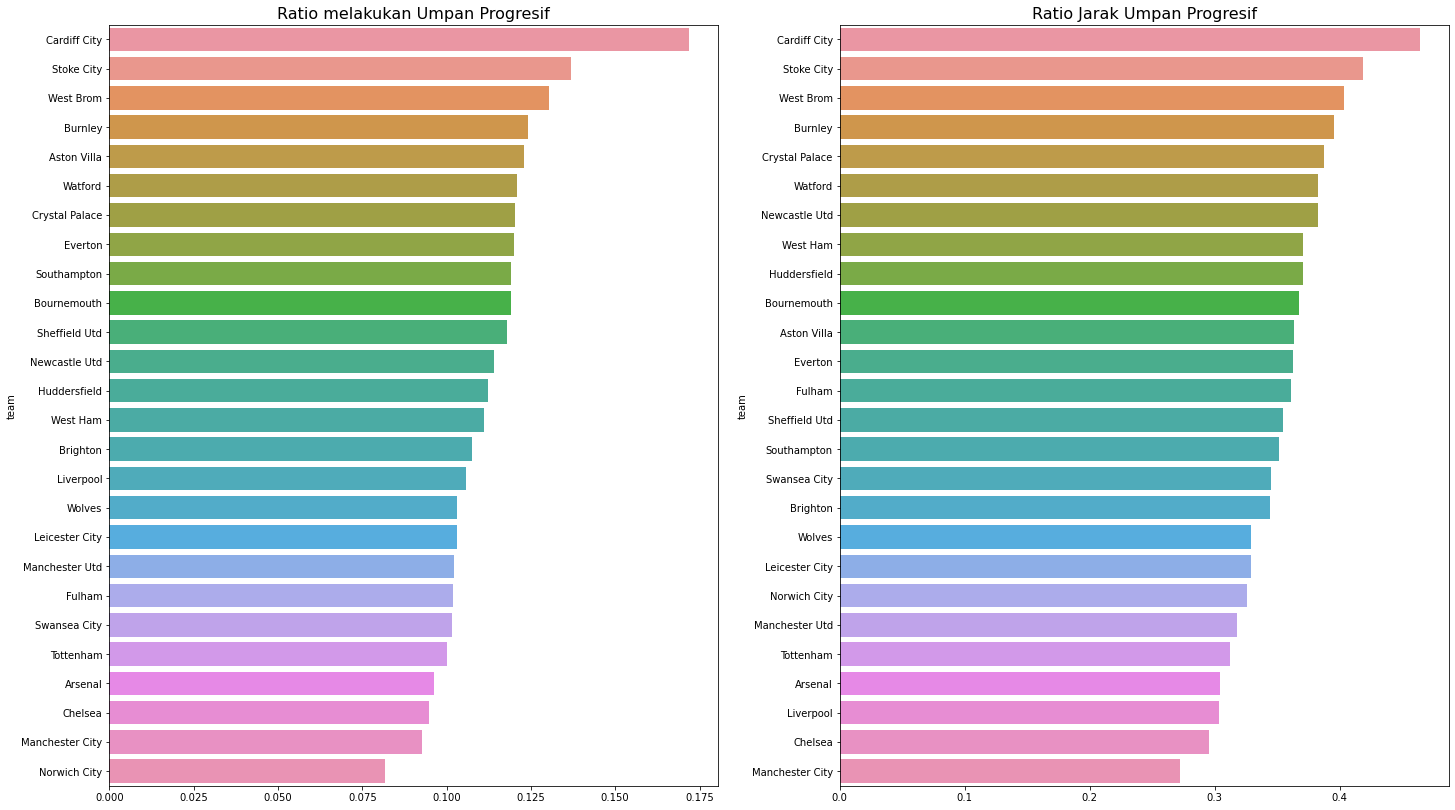

In [7]:
# fungsi untuk mencari ratio antara umpan progressive dari total banyak umpan
def progressive_rat(x):
    prog_percent = x['pass_prog'].mean()/x['pass'].mean()
    return prog_percent
# fungsi untuk mencari ratio antara jarak umpan progressive dari total jarak umpan
def progressive_dist_rat(x):
    prog_percent = x['pass_prg_dist'].mean()/x['pass_tot_dist'].mean()
    return prog_percent

# melakukan aggregasi ratio 
df_prog_rat = df_epl.groupby('team').apply(progressive_rat)
df_prog_rat.sort_values(inplace=True,ascending=False)
# melakukan aggregasi ratio 
df_prog_dist_rat = df_epl.groupby('team').apply(progressive_dist_rat)
df_prog_dist_rat.sort_values(inplace=True,ascending=False)

#tampilan plot
fig,ax = plt.subplots(ncols=2,figsize=(24,14))
sns.barplot(y=df_prog_rat.index,x=df_prog_rat,ax=ax[0],ci=None)
ax[0].set_title('Ratio melakukan Umpan Progresif',fontsize= 16)

sns.barplot(y=df_prog_dist_rat.index,x=df_prog_dist_rat,ax=ax[1],ci=None)
ax[1].set_title('Ratio Jarak Umpan Progresif',fontsize= 16)

dapat kita lihat bahwa **team menengah kebawah** cenderung sering melakukan umpan progressive dan dengan jarak yang jauh atau (long-ball), namun dari sekian nama klub bola besar disitu ada **Liverpool** dimana pada musim 2017 hingga 2020 dilatih oleh **Jurgen Klopp** yang menganut filosofi **Gegen Pressing** dimana **Liverpool** relatif lebih sering melakukan umpan progressive dari pada klub besar lain sepertu **Chelsea** dan **Man City**, namun **Liverpool** tidak melakukan umpan jauh dikarenakan mereka tidak melakukan **parkir bus** atau tidak bertahan di 1/3 lapangan sendiri. namun pada klub **Norwitch City** mnjadi klub yang **sangat jarang** melakukan umpan progressive

### Ratio Jarak **Dribling** Progressive

Dalam Melkakukan pergerakan Bola, *Dribling* atau **menggiring bola** untuk melakukan **progresifitas** terkesan **lebih lambat** dari mengumpan. karenakan kecepatan lari manusia tidak secepat bola ditendang, mungkin terkesan buruk jika konteksnya untuk melakukan serangan cepat, namun beberapa klub sengaja untuk melakukan dribling untuk kepentingan taktik, seperti contoh memberikan waktu pada kawan untuk **melakukan posisi** yang tepat atau untuk **memancing lawan** keluar dari posisi semula.

Text(0.5, 1.0, 'Ratio Dribling pada kotak penalty Lawan')

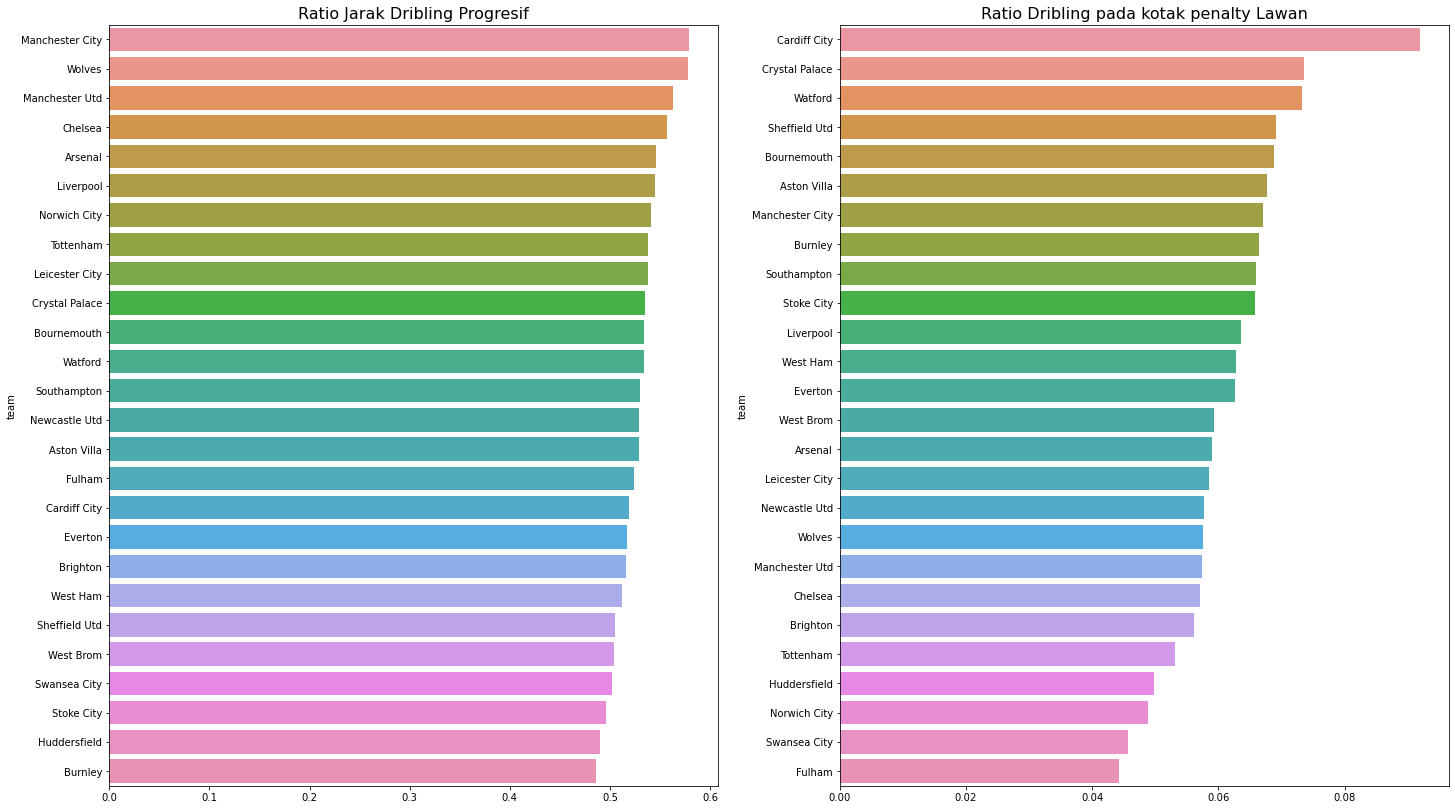

In [8]:

# fungsi untuk mencari ratio antara jarak menggiring bola progressive dari total jarak menggiring bola
def progressive_dist_rat_carr(x):
    prog_percent = x['carr_prg_dist'].mean()/x['carr_tot_dist'].mean()
    return prog_percent

# fungsi untuk mencari ratio antara dribbling pada 1/3 lapangan lawan dari total dribling
def pen_carr_rat(x):
    prog_percent = x['att_pen'].mean()/x['carries'].mean()
    return prog_percent

# melakukan aggregasi ratio 
df_prog_drib_rat = df_epl.groupby('team').apply(progressive_dist_rat_carr)
df_prog_drib_rat.sort_values(inplace=True,ascending=False)

# melakukan aggregasi ratio 
df_carr_rat_pen = df_epl.groupby('team').apply(pen_carr_rat)
df_carr_rat_pen.sort_values(inplace=True,ascending=False)

#tampilan plot
fig,ax = plt.subplots(ncols=2,figsize=(24,14))

sns.barplot(y=df_prog_drib_rat.index,x=df_prog_drib_rat,ax=ax[0],ci=None)
ax[0].set_title('Ratio Jarak Dribling Progresif',fontsize= 16)

sns.barplot(y=df_carr_rat_pen.index,x=df_carr_rat_pen,ax=ax[1],ci=None)
ax[1].set_title('Ratio Dribling pada kotak penalty Lawan',fontsize= 16)

Dapat dilihat jika melakukan **dribling** untuk sebuah **progresifitas** bola, sering dilakukan oleh klub bola yang terbilang menengah kebawah kecuali **Norwich City**. Sedangkan liverpool ada pada posisi paling atas antara klub **Big 6** lainnya.

Berbeda cerita pada **Dribling** ketika **didalam kotak penalti lawan** Dimana tujuannya melakukan penetrasi atau membuka ruang untuk menciptakan tendangan ke arah gawang lawan. dan pada klub **Big 6** paling sering melakukannya adalah **Manchaster City** dimana pada saat itu hingga sekarang dilatih oleh **Pep Guardiola** dimana dia adalah pelatih yang sangat ulung dalam melakukan **Positional Play** atau permainan dengan buka tutup ruang dan pergerakan pemain tanpa bola yang baik, bermaksud untuk memancing pemain lawan keluar dari posisi semestinya, dan tak sedikit orang yang menyebutnya **Tiki-Taka** karena terkesan banyak melakukan umpan pendek.

## Ketinggian Umpan

jenis umpan setiap pertandingan, dimana ketinggian umpan ada 3 macam yaitu 
- `ground` : tinggi umpan tepat di permukaan lapangan.
- `low` : tinggi umpan dibawah bahu.
- `high` : tinggi umpan diatas bahu.

jika kita lihat dengan barplot pada jenis umpan dari segi ketinggiannya.

In [9]:
# Dictionary untuk pewarnaan hanya pada big six 
# bigsix_palette = {'West Brom' :"#A4ABAB" , 'Everton':"#A4ABAB", 'Swansea City':"#A4ABAB", 'Huddersfield':"#A4ABAB", 'West Ham':"#A4ABAB", 
#  'Burnley':"#A4ABAB", 'Watford':"#A4ABAB", 'Crystal Palace':"#A4ABAB", 'Aston Villa':"#A4ABAB", 'Wolves':"#A4ABAB", 'Fulham':"#A4ABAB", 'Southampton':"#A4ABAB", 
#  'Leicester City':"#A4ABAB", 'Bournemouth':"#A4ABAB", 'Stoke City':"#A4ABAB", 'Cardiff City':"#A4ABAB", 'Newcastle Utd':"#A4ABAB", 'Norwich City':"#A4ABAB",
#  'Sheffield Utd':"#A4ABAB", 'Brighton':"#A4ABAB",'Chelsea':"#2C26E0", 'Liverpool':"#E00600",'Manchester Utd':"#E0DF10",'Arsenal':"#E09301",'Manchester City':"#00DBE0",'Tottenham':"#4D0069"}
group_ground = df_epl.groupby('team')['ground'].mean().sort_values(ascending=False)

group_low = df_epl.groupby('team')['low'].mean().sort_values(ascending=False)

group_high = df_epl.groupby('team')['high'].mean().sort_values(ascending=False)


Text(0.5, 1.0, 'Rata-Rata Umpan Dia Atas Bahu')

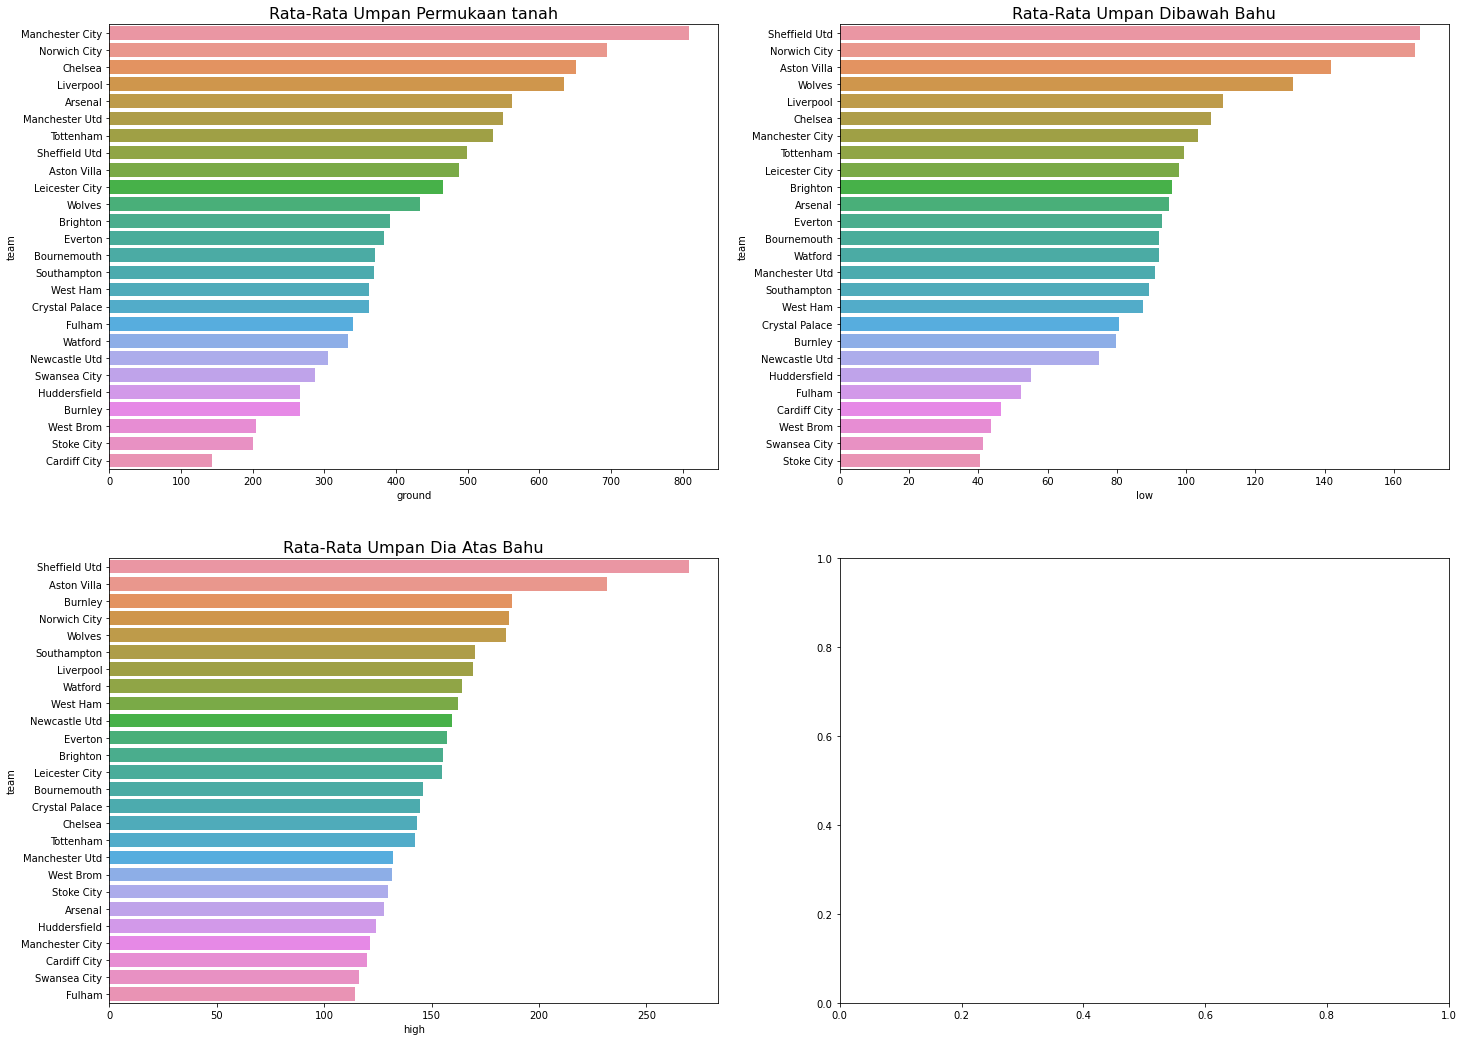

In [10]:

fig,ax = plt.subplots(nrows=2,ncols= 2,figsize=(24,18))
sns.barplot(y=group_ground.index,x=group_ground,ax=ax[0,0],ci=None)
ax[0,0].set_title('Rata-Rata Umpan Permukaan tanah',fontsize= 16)

sns.barplot(y=group_low.index,x=group_low,ax=ax[0,1],ci=None)
ax[0,1].set_title('Rata-Rata Umpan Dibawah Bahu',fontsize= 16)

sns.barplot(y=group_high.index,x=group_high,ax=ax[1,0],ci=None)
ax[1,0].set_title('Rata-Rata Umpan Dia Atas Bahu',fontsize= 16)


Pada ketinggian umpan permukaan tanah, lebih **didominasi** oleh team **Big 6** namun **Norwich City** terlihat jauh berbeda dari team menengah bawah lainnya, karena sering melakukan umpan-umpan pada ketinggian permukaan tanah.

pada umpan lambung **dibawah bahu**, masih ada **Norwich City** dimana lebih sedikit dengan rata-rata pada **Sheffield United**, dan pada team **big 6** terlihat **hampir sama** satu sama lain.

pada umpan lambung **diatas bahu**, **Liverpool** adalah satu-satunya team dari **Big 6** yang **paling sering** melakukan umpan yang tinggi, sedangkan **Manchester City** merupakan yang paling Jarang Melakukan Umpan lambung yang tinggi.

## Pressing

Dalam Sepakbola, **pressing** atau tekanan adalah mekanisme bertahan dimana setiap pemain yang bertahan **mencoba untuk merebut bola dari lawan dengan mendekati lawan yang memegang bola**,
**kelebihan dari melakukan pressing** adalah memotong visi lawan untuk melihat celah, memaksa lawan untuk melakukan kesalahan, mengurangi akurasi umpan lawan. sedangkan **kekurangan pressing** adalah membutuhkan stamina yang tinggi, membuat pemain lebih sering cedra jika kelelahan. 

dan pada intensitas pressing suatu team sepakbola, dapat dinilai bahwa team tersebut memiliki kecenderungan pekerja keras, dikarenakan harus terus bergerak mendekati pemain lawan yang memiliki bola.

In [11]:
list_pop_formation = list(df_epl.value_counts('formation')[:11].index)

In [12]:
df_filter_formation = df_epl.query("formation in @list_pop_formation")

Text(0.5, 1.0, 'Pressing dan Hasil Akhir')

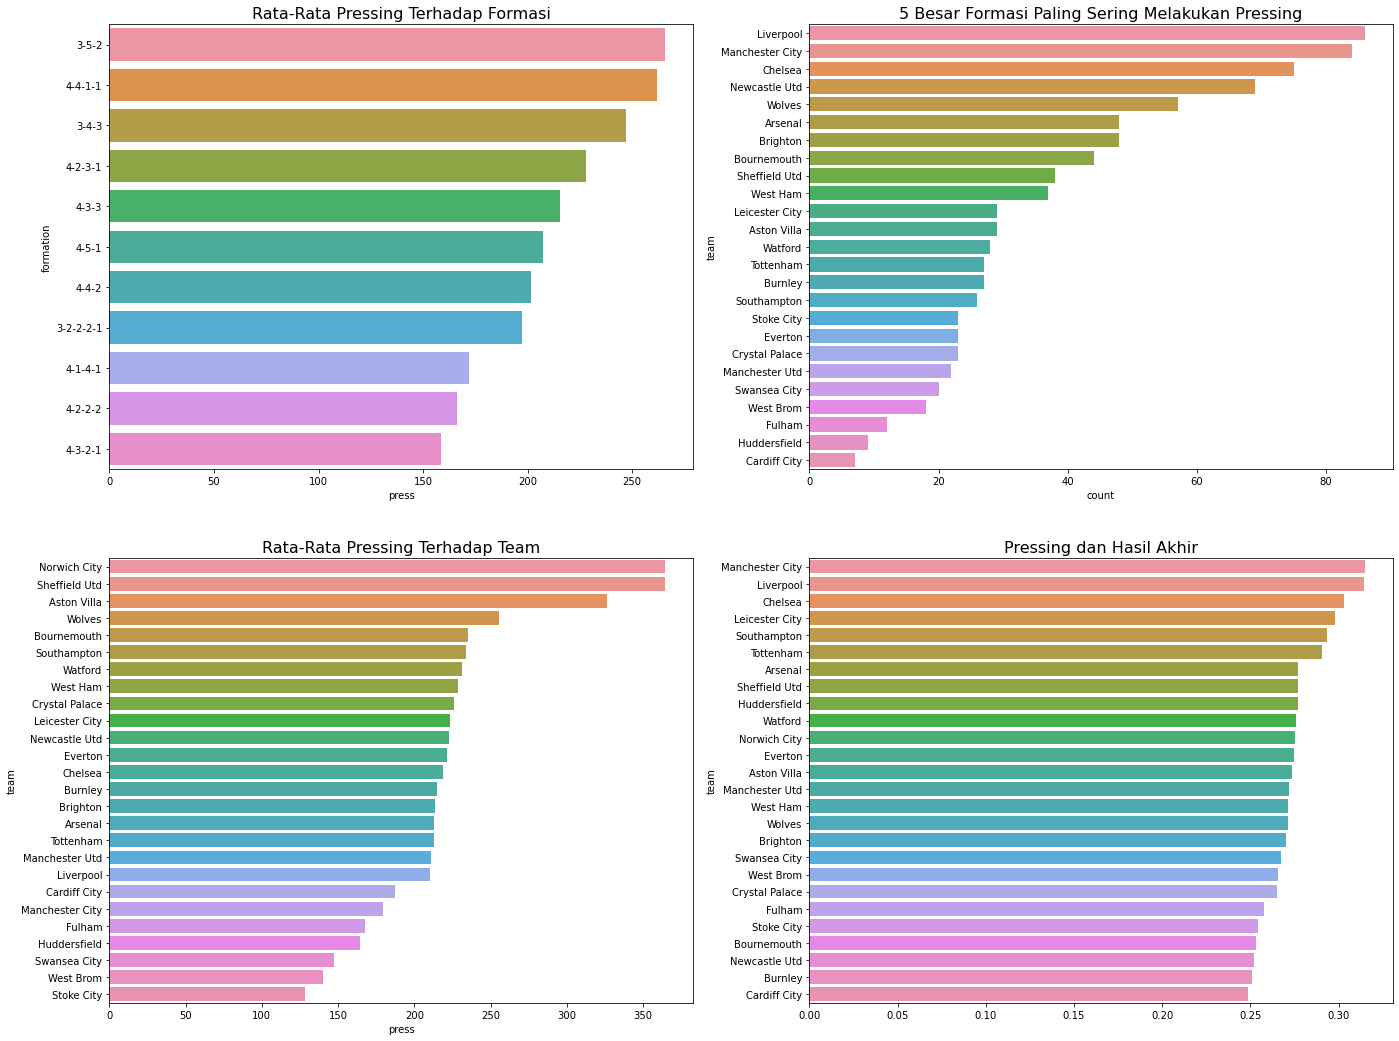

In [13]:
group_form = df_filter_formation.groupby('formation')['press'].mean().sort_values(ascending=False)
group_team = df_epl.groupby('team')['press'].mean().sort_values(ascending=False) #press_succ
group_team_sc = df_filter_formation.groupby('formation')['press_succ'].mean().sort_values(ascending=False)
df_select_form = df_epl.query("formation == '3-5-2' or formation == '4-4-1-1' or formation == '3-4-3' or formation == '4-3-2-1' or formation == '4-3-3'")

def succ_pressing_rat(x):
    percent = x['press_succ'].sum()/x['press'].sum()
    return percent

g_press_rat = df_epl.groupby('team').apply(succ_pressing_rat)
g_press_rat.sort_values(inplace=True,ascending=False)

fig,ax = plt.subplots(nrows=2,ncols= 2,figsize=(23,18))
sns.barplot(y=group_form.index,x=group_form,ax=ax[0,0],ci=None)
ax[0,0].set_title('Rata-Rata Pressing Terhadap Formasi',fontsize= 16)

sns.countplot(data = df_select_form,y="team",order=df_select_form['team'].value_counts().index,ax=ax[0,1])
ax[0,1].set_title('5 Besar Formasi Paling Sering Melakukan Pressing',fontsize= 16)

sns.barplot(y=group_team.index,x=group_team,ax=ax[1,0],ci=None)
ax[1,0].set_title('Rata-Rata Pressing Terhadap Team',fontsize= 16)

sns.barplot(y=g_press_rat.index,x=g_press_rat,ax=ax[1,1],ci=None)
ax[1,1].set_title('Pressing dan Hasil Akhir',fontsize= 16)


Jika dilihat dari **Intensitas Pressing**, **Formasi** yang paling sering untuk melakukan pressing adalah  **3-5-2 ,4-4-1-1 ,3-4-3, 4-3-2-1 ,4-3-3**, dan jika dilihat, dari **team yang sering menggunakan formasi** tersebut adalah **Liverpool, Manchestrer City, Chelsea, dan New Castle**.

jika dilihat secara umum justru team seperti **Aston Vila, Sheffield United, dan Norwich City** merupakan team yang rata-rata **intensitas pressingnya tinggi**.

dan **rasio pressing suksess** ada pada team Manchester City dan Liverpool.


## Peluang

**Setpiece** merupakan bagian **permainan** bola yang **dimulai dari bola mati** seperti tendangan sudut, lemparan kedalam, tendangan bebas

Text(0.5, 1.0, 'Shot Dari Umpan Bola Team')

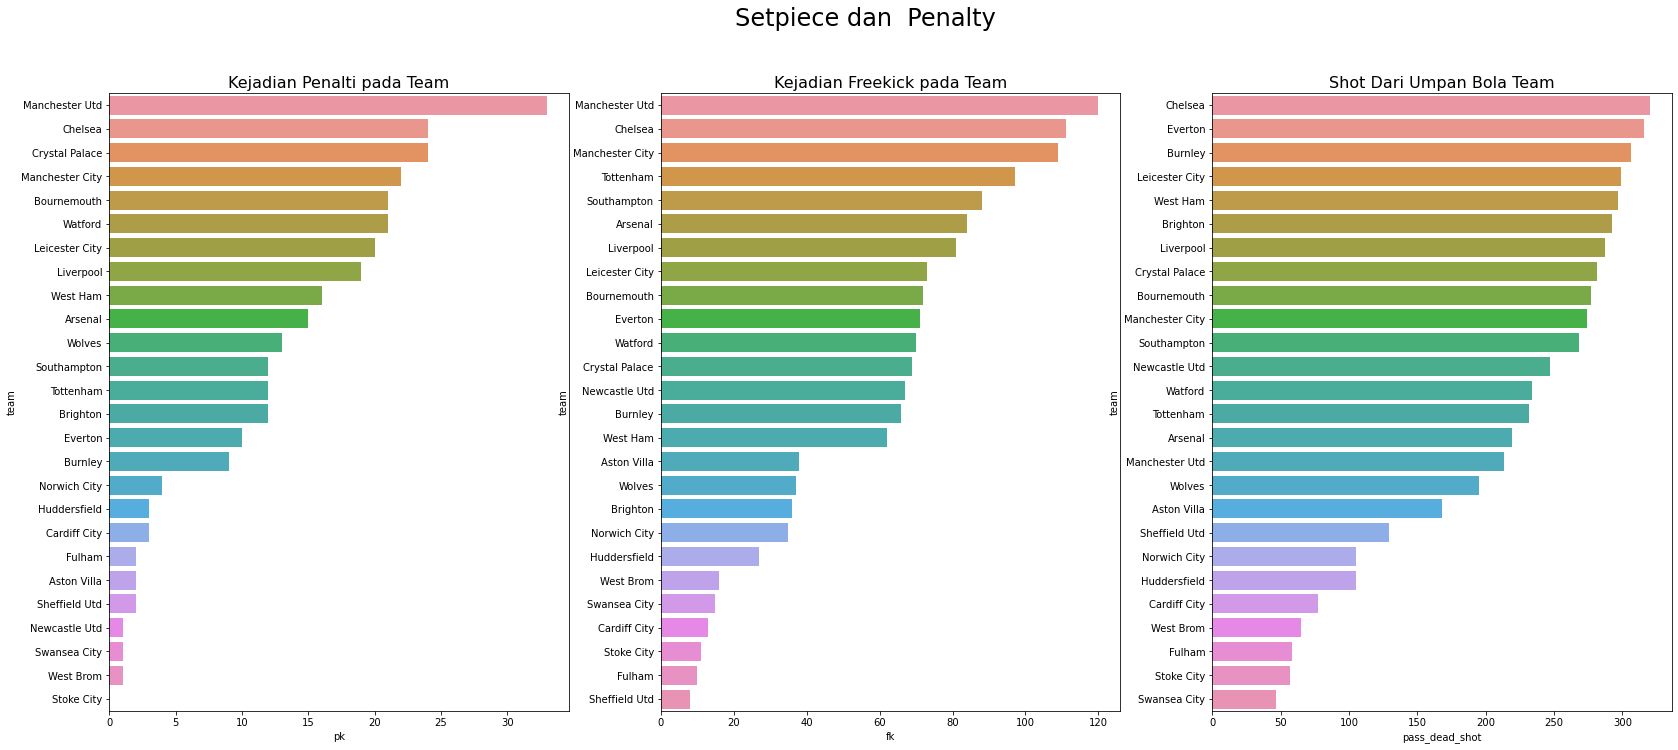

In [14]:
g_pk = df_epl.groupby('team')['pk'].sum()
g_pk.sort_values(ascending=False,inplace=True)

g_fk = df_epl.groupby('team')['fk'].sum()
g_fk.sort_values(ascending=False,inplace=True)

g_pd = df_epl.groupby('team')['pass_dead_shot'].sum()
g_pd.sort_values(ascending=False,inplace=True)
judul = 'Setpiece dan  Penalty'

fig,ax = plt.subplots(ncols=3,figsize=(28,12))
fig.suptitle(judul,fontsize=24, y=.94)
fig.subplots_adjust(top=.84)
fig.subplots_adjust(hspace=.6)

sns.barplot( x=g_pk,y=g_pk.index,estimator=sum,ax=ax[0],ci=None)
ax[0].set_title('Kejadian Penalti pada Team',fontsize= 16)

sns.barplot(x=g_fk,y=g_fk.index,estimator=sum,ax=ax[1],ci=None)
ax[1].set_title('Kejadian Freekick pada Team',fontsize= 16)

sns.barplot(x=g_pd,y=g_pd.index,estimator=sum,ax=ax[2],ci=None)
ax[2].set_title('Shot Dari Umpan Bola Team',fontsize= 16)

sangat jelas terlihat bahwa **Manchester United** mendapatkan **tendangan penalti** dan **tendangan bebas** yang **paling banyak**. sedangkan Chelsea menjadi yang terbanyak dalam melahirkan tendangan / shot dari umpan bola-bola mati.

## Hasil Akhir

Hasil akhir merupakan hal yang penting dalam  sebuah kompetisi, namun  jika hanya melihat menang kalah saja bukanlah hal yang sangat sportif untuk dilakukan.

namun disini kita lihat **apakah bermain oportunis** dalam Liga Inggris Premier League **dapat menghasilkan Kemenangan**. sebelum melihat datavisual apakah permainan  **oportunis** itu? permainan oportunis adalah permainan yang sangat mengandalkan setpiece, atau permainan dari bola mati atau mencari penalty.

Text(0.5, 1.0, 'Umpan Permainan Terbuka Terhadap Hasil Akhir')

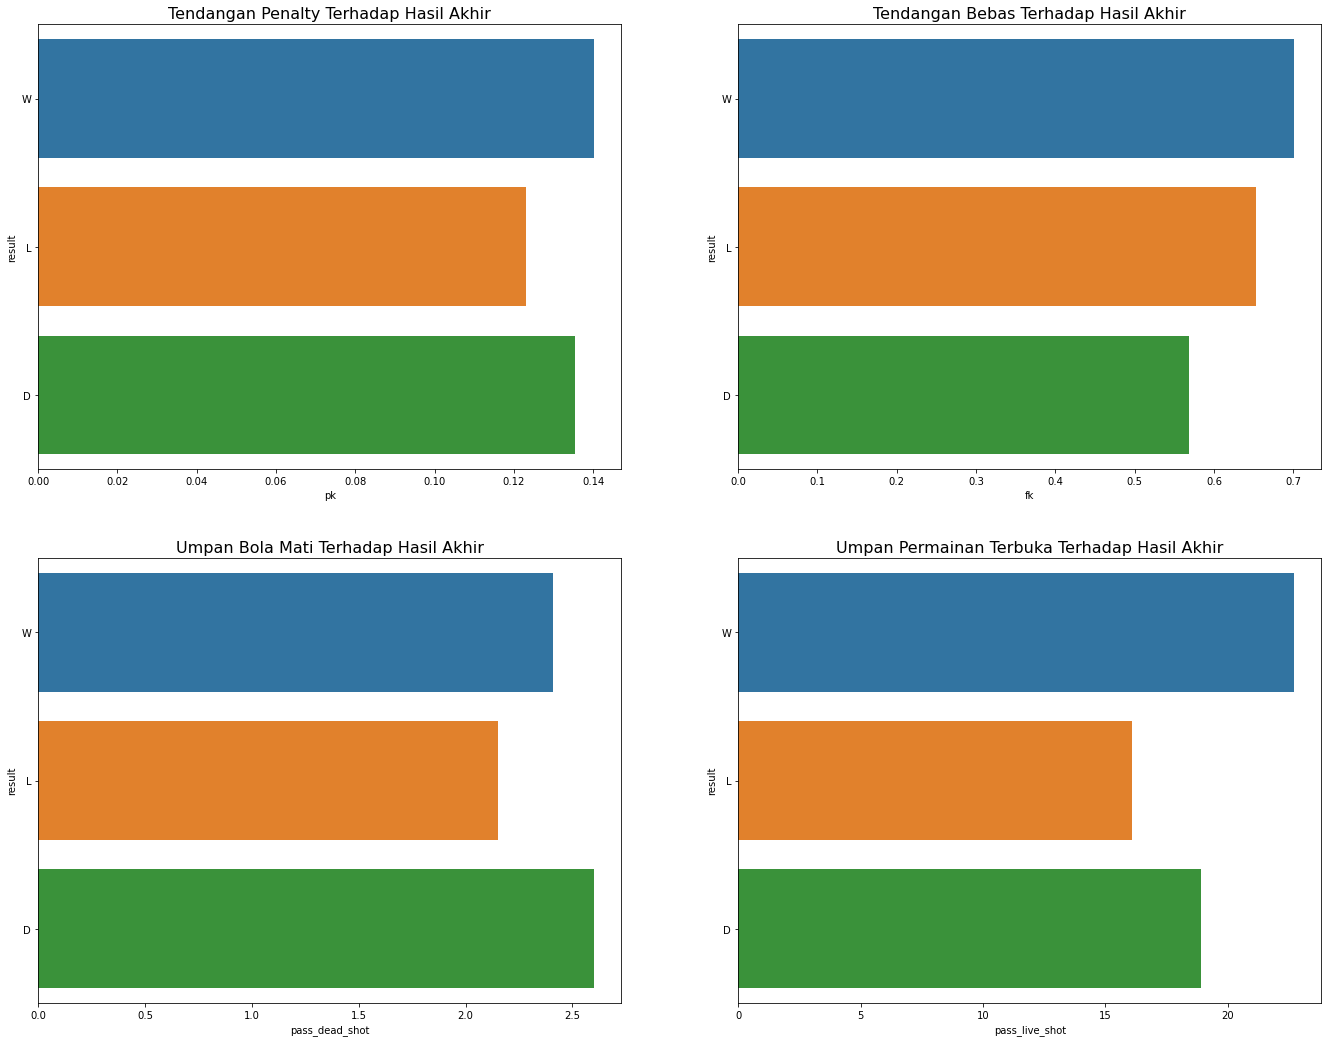

In [15]:
fig,ax = plt.subplots(nrows=2,ncols= 2,figsize=(23,18))

sns.barplot(data=df_epl,y='result',x='pk',ax=ax[0,0],ci=None)
ax[0,0].set_title('Tendangan Penalty Terhadap Hasil Akhir',fontsize= 16)

sns.barplot(data=df_epl,y='result',x='fk',ax=ax[0,1],ci=None)
ax[0,1].set_title('Tendangan Bebas Terhadap Hasil Akhir',fontsize= 16)

sns.barplot(data=df_epl,y='result',x='pass_dead_shot',ax=ax[1,0],ci=None)
ax[1,0].set_title('Umpan Bola Mati Terhadap Hasil Akhir',fontsize= 16)

sns.barplot(data=df_epl,y='result',x='pass_live_shot',ax=ax[1,1],ci=None)
ax[1,1].set_title('Umpan Permainan Terbuka Terhadap Hasil Akhir',fontsize= 16)

Jika Dilihat pada **permainan terbuka** atau permainan dimulai dari lini bertahan, lebih **menjanjikan untuk mendapatkan kemenangan atau Seimbang**.

sedangkan dengan gaya yang **oportunis**, belum bisa menjadi hal yang konsisten untuk mendapatkan kemenangan  karena ratio antar label hasil akhir tidak berbeda jauh.

# V. Data Preprocessing

- pilih **inference data**
- pilih **non inference** data untuk dijadikan data training dan test


## Inference & Non-Inference

**Set Data Inference**

In [16]:
# take 12 sample of random data
pickup_inf = df_epl.sample(12,random_state=12)

pickup_inf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1420 to 1156
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      12 non-null     int64 
 1   result          12 non-null     object
 2   formation       12 non-null     object
 3   team            12 non-null     object
 4   opponent        12 non-null     object
 5   venue           12 non-null     object
 6   date            12 non-null     object
 7   pass_live_shot  12 non-null     int64 
 8   pass_dead_shot  12 non-null     int64 
 9   drib_shot       12 non-null     int64 
 10  pk              12 non-null     int64 
 11  fk              12 non-null     int64 
 12  pass_prog       12 non-null     int64 
 13  pass_prg_dist   12 non-null     int64 
 14  pass_tot_dist   12 non-null     int64 
 15  pass            12 non-null     int64 
 16  ground          12 non-null     int64 
 17  low             12 non-null     int64 
 18  high   

**Set Non-Inference**

In [17]:
# REMOVE INFERENCE SET FROM DATA SET for non inference data
non_inference = df_epl.drop(pickup_inf.index)
non_inference.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2268 entries, 0 to 2279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2268 non-null   int64 
 1   result          2268 non-null   object
 2   formation       2268 non-null   object
 3   team            2268 non-null   object
 4   opponent        2268 non-null   object
 5   venue           2268 non-null   object
 6   date            2268 non-null   object
 7   pass_live_shot  2268 non-null   int64 
 8   pass_dead_shot  2268 non-null   int64 
 9   drib_shot       2268 non-null   int64 
 10  pk              2268 non-null   int64 
 11  fk              2268 non-null   int64 
 12  pass_prog       2268 non-null   int64 
 13  pass_prg_dist   2268 non-null   int64 
 14  pass_tot_dist   2268 non-null   int64 
 15  pass            2268 non-null   int64 
 16  ground          2268 non-null   int64 
 17  low             2268 non-null   int64 
 18  high    

In [18]:
# reset index for safety measure
non_inference.reset_index(drop=True,inplace=True)


## Feature Selection

Dari prosess **EDA** dapat ditentukan **feature** apasaja yang akan digunakan .

drop beberapa fitur,
- `Unnamed: 0` Karenakan id tidak berarti apapun dalam *clustering*

-  `result`, `formation`,`team`,`opponent`,`venue`,`date` dikarenakan nilai berupa kategori

- `pass` dikarenakan polanya mirip dengan carries.

- `carr_att_3rd` kurang representatif menjadi acuan pola permainan.



In [19]:
drop_list =['Unnamed: 0','opponent','result', 'formation', 'team','venue','date','pass','carr_att_3rd'] 
features = non_inference.drop(drop_list,axis=1)

In [20]:
features

,pass_live_shot,pass_dead_shot,drib_shot,pk,fk,pass_prog,pass_prg_dist,pass_tot_dist,ground,low,high,carries,carr_tot_dist,carr_prg_dist,att_pen,press,press_succ
0,39,4,2,0,0,36,2100,6264,513,30,116,360,2289,1154,16,474,126
1,22,2,0,0,0,36,2304,7285,611,24,110,380,2014,956,22,152,46
2,8,1,1,0,1,50,3193,8722,395,49,110,512,2976,1700,25,430,120
3,23,0,1,0,0,65,3543,10863,449,29,136,583,2305,1064,41,312,96
4,12,0,1,0,1,50,3192,10302,351,29,152,526,2955,1355,25,374,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,18,3,3,0,3,93,8787,29691,996,345,414,1236,8304,4653,42,122,43
2264,36,6,9,3,0,117,9015,32103,1287,225,270,1368,7923,4656,48,144,22
2265,39,6,12,0,0,120,7167,21924,687,261,420,912,6159,3894,66,121,39
2266,33,6,6,0,0,87,8358,25200,822,225,450,1119,5979,3072,57,152,44


## Missing Value
**Check** jika feature memiliki **Missing Value**

Check missing value pada **Features**

In [21]:
features.isnull().sum()

pass_live_shot    0
pass_dead_shot    0
drib_shot         0
pk                0
fk                0
pass_prog         0
pass_prg_dist     0
pass_tot_dist     0
ground            0
low               0
high              0
carries           0
carr_tot_dist     0
carr_prg_dist     0
att_pen           0
press             0
press_succ        0
dtype: int64

feature yang telah dipilih **tidak terdapat** missing value

## Bagi Antara Numerik and Kategori

dikarenakan**tidak ada data ketegori** yang dipilih maka lewati langkah pembagian data ini

## Outliers
Dikarenakan objective kali ini menggunakan Windsorizer

### Distribusi Feature

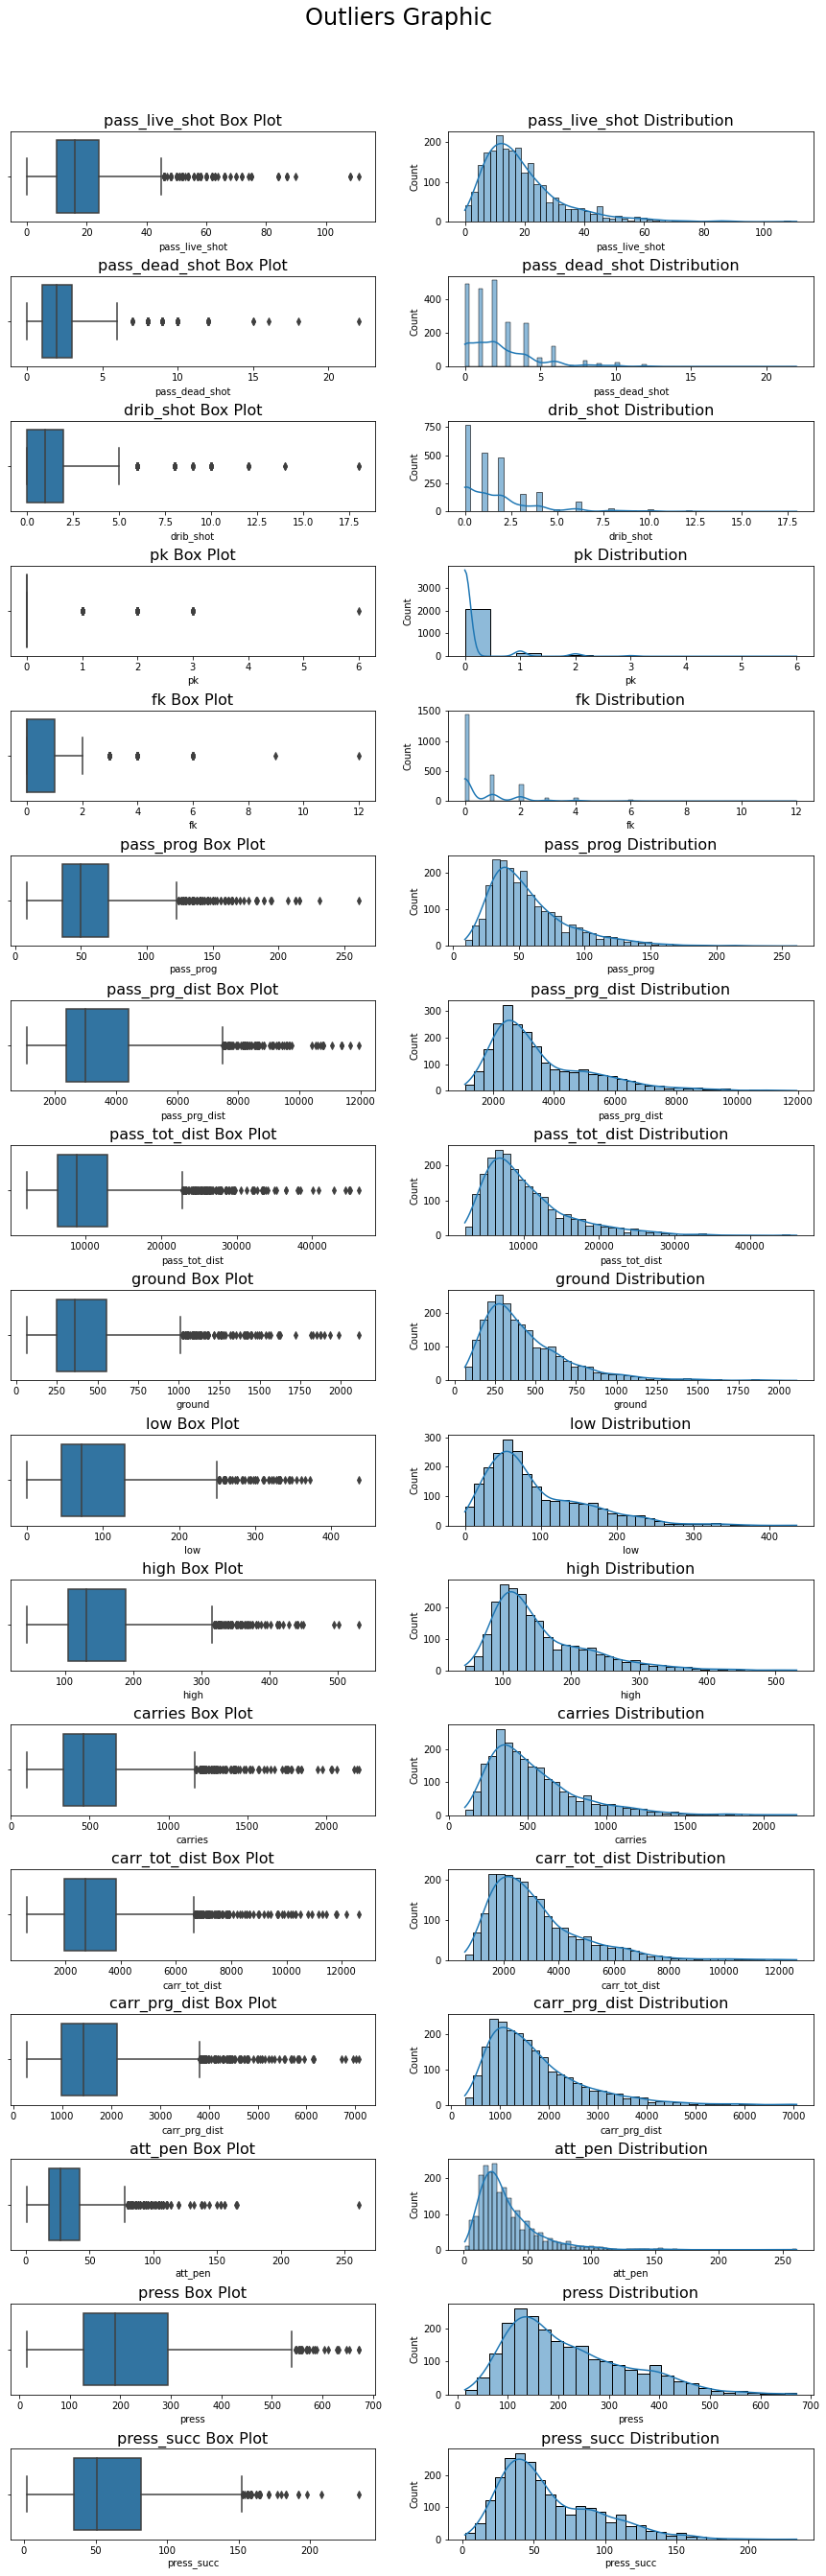

In [22]:
outlier_graph(features,size=(15,45))

terdapat bebrapa banyak sekali feature yang memiliki distribusi skew extreme

### Jumlah outlier

In [23]:
col_skews = skewness(features)

In [24]:
outliers = outliersCheck(features,col_skews)


feature name :  press
outliers percentage : 1.2%
distribution right_skew
upper : 543.0 lower : -121.0
****************************************************
feature name :  pass_live_shot
outliers percentage : 0.2%
distribution right_skew_ext
upper : 88.0 lower : -38.0
****************************************************
feature name :  pass_dead_shot
outliers percentage : 0.2%
distribution right_skew_ext
upper : 12.0 lower : -6.0
****************************************************
feature name :  drib_shot
outliers percentage : 0.2%
distribution right_skew_ext
upper : 12.0 lower : -6.0
****************************************************
feature name :  pk
outliers percentage : 3.4%
distribution right_skew_ext
upper : 1.0 lower : 0.0
****************************************************
feature name :  fk
outliers percentage : 0.1%
distribution right_skew_ext
upper : 6.0 lower : -3.0
****************************************************
feature name :  pass_prog
outliers percentage : 0.1

meskipun pada plot box terlihat banyak outlier, tetapi dalam bentuk persentase, jumlahnya tidak terlalu banyak

### Censoring Nilai Outlier 

**Censor** atau **Capping** dilakukan dengan menggunakan library `Winsorizer`

In [25]:
# outliers use quantile 0.05 and 0.95 to handle the serum_creatinine
features_clean = censoring_outliers(features,outliers,0.01)

jika check kembali, outlier sudah hilang

In [26]:
col_skews = skewness(features_clean)
outliers = outliersCheck(features_clean,col_skews)

outlier sudah tidak ada lagi

In [ ]:
print(features.describe().T)
print(features_clean.describe().T)

                 count          mean          std     min      25%     50%  \
pass_live_shot  2268.0     19.242504    13.700988     0.0    10.00    16.0   
pass_dead_shot  2268.0      2.349206     2.356179     0.0     1.00     2.0   
drib_shot       2268.0      1.734568     2.124096     0.0     0.00     1.0   
pk              2268.0      0.132275     0.472591     0.0     0.00     0.0   
fk              2268.0      0.651675     1.096335     0.0     0.00     0.0   
pass_prog       2268.0     57.665344    31.540208     9.0    36.00    50.0   
pass_prg_dist   2268.0   3570.091711  1716.436035  1085.0  2377.75  3008.0   
pass_tot_dist   2268.0  10567.927249  6236.056055  2223.0  6311.75  8811.5   
ground          2268.0    437.937390   274.843706    65.0   249.00   362.0   
low             2268.0     92.257055    65.678298     0.0    46.00    72.0   
high            2268.0    153.836420    71.033999    44.0   104.00   132.0   
carries         2268.0    540.802910   302.549685   101.0   330.

Nilai Maksimal pada setiap kolom berubah dan rata-rata nilai sedikit berubah

In [ ]:
features = features_clean

## Feature Scalling
Feature Scalling untuk seluruh data dengan menggunakan MinMaxScaller

In [ ]:
scale = MinMaxScaler()
scale.fit(features)

features_scaled = scale.transform(features)

features_scaled

array([[0.59090909, 0.4       , 0.2       , ..., 0.13932751, 1.        ,
        0.53448276],
       [0.33333333, 0.2       , 0.        , ..., 0.19505852, 0.48813511,
        0.18965517],
       [0.12121212, 0.1       , 0.1       , ..., 0.22292402, 1.        ,
        0.50862069],
       ...,
       [0.59090909, 0.6       , 1.        , ..., 0.60375255, 0.37768118,
        0.15948276],
       [0.5       , 0.6       , 0.6       , ..., 0.52015605, 0.48813511,
        0.18103448],
       [0.22727273, 0.        , 0.3       , ..., 0.21363552, 0.25297513,
        0.10775862]])

## Feature Dimensional Reduction
*feature dimensional reduction* dilakukan dengan `PCA`. mengapa dilakukan `PCA` padahal feature sudah relatif kecil ?


### Nilai VIF

Melihat **nilai VIF** pada setiap **kolom features** untuk menilai apakah kolom tersebut memiliki ***multicollinearity*** yang tinggi dengan melihat **nilai VIF** tersebut

In [ ]:
backup_scaled = features_scaled.copy()
# calculating VIF for each feature
vif_vals = [variance_inflation_factor(features_scaled, i) for i in range(features_scaled.shape[1])]
idx = [i for i in range(len(vif_vals))]
vif_data = pd.DataFrame({'idx':idx,'vif_value':vif_vals}, index=features.columns)

print(features_scaled.shape)
vif_data


(2268, 17)


,idx,vif_value
pass_live_shot,0,7.726366
pass_dead_shot,1,2.652494
drib_shot,2,2.237955
pk,3,1.132540
fk,4,1.585558
pass_prog,5,30.727659
pass_prg_dist,6,50.846403
pass_tot_dist,7,128.567847
ground,8,8.712040
low,9,8.391794



jika VIF <= 5 ada 4 kolom maka saya berasumsi bahwa ada **diantara 4 hingga 5**, nantinya akan dibuktikan dengan EVR

###  Nilai EVR

mencari nilai EVR pada PCA, untuk melihat seberapa banyak kolom yang akan direduksi 

In [ ]:
pca = PCA()
pca.fit(features_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
pca.explained_variance_ratio_

array([0.37504326, 0.17283462, 0.12276876, 0.08045226, 0.0634817 ,
       0.05648197, 0.04055134, 0.02257661, 0.01948853, 0.01494526,
       0.00868916, 0.00773717, 0.007262  , 0.0044264 , 0.00195408,
       0.00080998, 0.00049691])

setelah dilakukan PCA, coba tampilkan grafik untuk posisi **elbow**

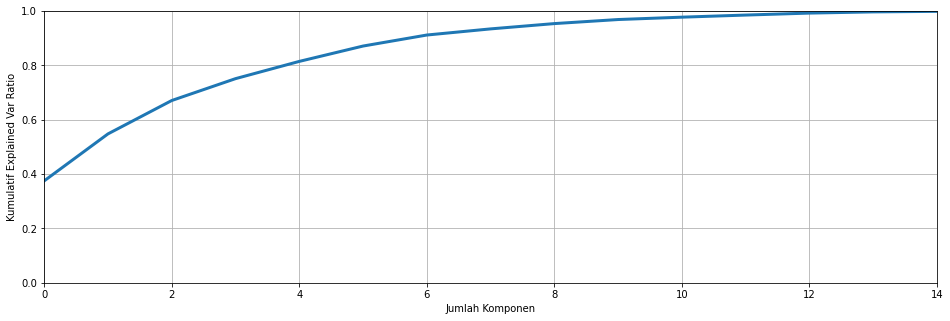

In [ ]:
fig,ax=plt.subplots(figsize=(16,5))
# ax[0].plot(range(1,len(cumsum)+1),pca.explained_variance_ratio_)
# ax[0].set_xlabel('Komponen')
# ax[0].set_ylabel('Explained Variance Ratio')

ax.plot(cumsum,linewidth=3)
ax.set_xlabel('Jumlah Komponen')
ax.set_ylabel('Kumulatif Explained Var Ratio')
# ax[1].plot(cumsum, linewidth=3)
ax.axis([0, 14, 0, 1])
# # ax[1].ylabel("Explained Variance Ratio")
# ax[1].plot([d, d], [0, 0.95], "k:")
# ax[1].plot([0, d], [0.95, 0.95], "k:")
# ax[1].plot(d, 0.95, "ko")
ax.grid(True)


Bisa diingat bahwa asumsi evaluasi VIF adalah reduksi komponen paling optimal ada disekitar  **4 hingga 5 kolom**

dan dapat dibuktikan bahwa **kenaikan nilai EVR tidak signifikan** dimulai dari **komponen 4, dan pada EVR 0.9 pada komponen 6**

Text(0.5, 1.0, 'Scaled Data')

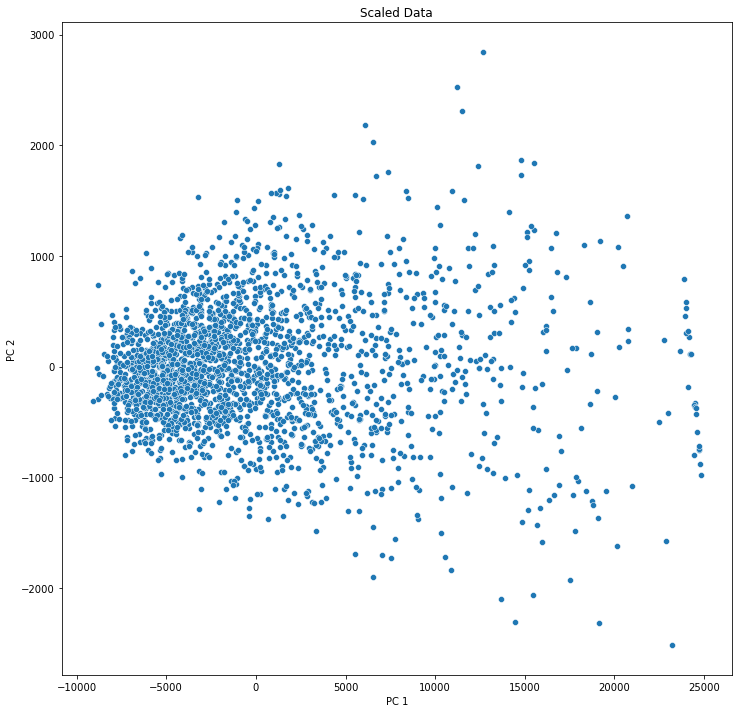

In [ ]:

pca2d=PCA(n_components=2).fit(features)
pca2d_trans=pca2d.transform(features)

fig,ax=plt.subplots(figsize=(12,12))
sns.scatterplot(x=pca2d_trans[:,0],y=pca2d_trans[:,1])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Scaled Data')

persebaran Tabel PCA membentuk **pola berbentuk Corong**, kemungkinan besar untuk **tidak menggunakan** **DBSCAN**,karenakan ada beberapa data point yang sangat berdekatan tapi semakin jauh semakin berjauhan  untuk algorithm pembanding selain **K Means** karena dipastikan akan membuat 1 klaster saja

In [ ]:
pca = PCA(n_components=5)
pca.fit(features)
features_reduced = pca.transform(features)

feature di reduksi hingga **5 komponen**, sesuai dengan **hasil evaluasi dari nilai VIF dan EVR**

# VI. Model Definition

model untuk membuat clustering, menggunakan pendekatan *machine learning* ***unsupervised*** dengan **2 algoritma** yang **Clustering** yang berbeda

In [ ]:
"""
Fungsi untuk menampilkan visualisasi
untuk mempermudah evaluasi 
"""

def innertiaPlot(k_range,random=42,inertias=0):
    plt.figure(figsize=(8, 3.5))
    plt.plot(range(1, k_range + 1), inertias, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Inertia", fontsize=14)
    # plt.annotate('Elbow',
    #             xy=(4, inertias[3]),
    #             xytext=(0.55, 0.55),
    #             textcoords='figure fraction',
    #             fontsize=16,
    #             arrowprops=dict(facecolor='black', shrink=0.1)
    #             )
    plt.axis([1, k_range,  inertias[len(inertias)-1],inertias[0]])
    plt.show()
    

def silhouettePlot(kmeans_per_k,silhouette_scores,max_k,size=(11, 28),cols = 2) :   
    plt.figure(figsize=size)

    for k in range(2, max_k+1):
        plt.subplot(max_k+1, cols, k - 1)
        
        y_pred = kmeans_per_k[k - 1].labels_
        silhouette_coefficients = silhouette_samples(features_reduced, y_pred)

        padding = len(features_reduced) // 30
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = mpl.cm.gnuplot(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                            facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        if k in (3, 5):
            plt.ylabel("Cluster")
        
        if k in range(2, max_k+1):
            plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.xlabel("Silhouette Coefficient")
        else:
            plt.tick_params(labelbottom=False)

        plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
        plt.title("$k={}$".format(k), fontsize=16)
    plt.show()

def silhouetteLine(silhouette_scores,k_range):
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, k_range), silhouette_scores, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Silhouette score", fontsize=14)
    plt.axis([1, k_range, 0.1,silhouette_scores[0]])
    plt.show()
    
def bic_aic(bics,aics):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(bics)+1), bics, "bo-", label="BIC")
    plt.plot(range(1, len(aics)+1), aics, "go--", label="AIC")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Information Criterion", fontsize=14)
    plt.axis([1, len(bics)+1, np.min(aics) - 50, np.max(aics) + 50])
    # plt.annotate('Minimum',
    #             xy=(3, bics[2]),
    #             xytext=(0.35, 0.6),
    #             textcoords='figure fraction',
    #             fontsize=14,
    #             arrowprops=dict(facecolor='black', shrink=0.1)
    #             )
    plt.legend()
    plt.show()



## K Means

sebelum memastikan model dengan parameter yang tepat, pertama harus memilih **nilai K** yang optimal. untuk memilih K yang tepat dilakukan **2 Method** dan **dibandingkan** yaitu **Elbow Method** dan **Sillouette Score**

### Method Elbow Terhadap Inertia

c:\Users\ajies\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


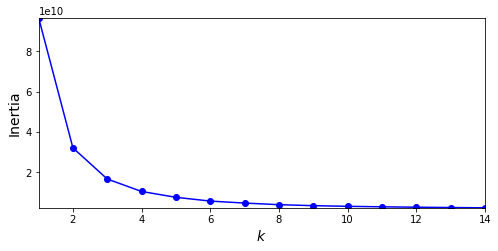

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(features_reduced)
            for k in range(1, 15)]
inertias = [model.inertia_ for model in kmeans_per_k]

# Evaluasi Nilai
silhouette_scores = [silhouette_score(features_reduced, model.labels_)
                     for model in kmeans_per_k[1:]]

innertiaPlot(k_range=14,inertias=inertias)


jika dilihat dari nilai **inertia**, **nilai K** yang **paling optimal** diantara 4 hingga 5.Tidak hanya sampai pada nilai Inertia  ***Silhouette Score***.

### Silhouette Scores

untuk melihat ***Silhouette Score*** digunakan **visualisasi **untuk dapat membandingkan antar **nilai k**

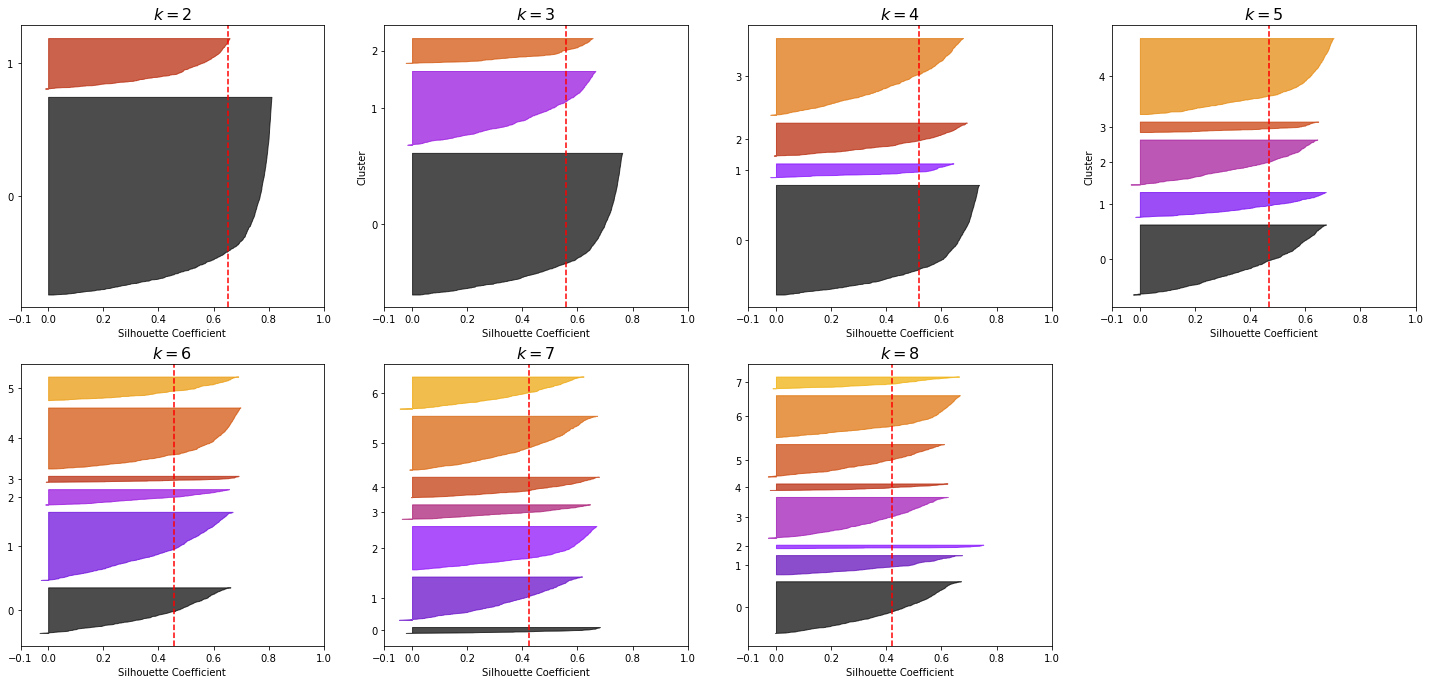

In [ ]:
silhouettePlot(kmeans_per_k=kmeans_per_k,silhouette_scores=silhouette_scores,max_k=8,size=(25,55),cols=4)

dari hasil **Silhouette Score** dapat dipilih kuster dengan 5 segmentasi , karena terlihat lebih konsisten dan setiap label terlihat tidak jauh dari **silhouette score**. namun pada 6 segmen klaster juga terlihat tidak jauh dari **silhouette score**, maka harus ditinjau juga nilai **silhouette score** dengan **line chart** mana yang memiliki **silhouette score** paling tinggi diantara dua jumlah klaster trsebut.

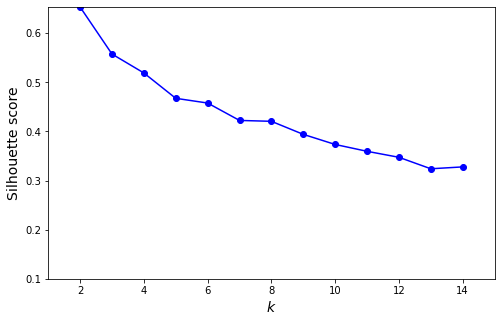

In [ ]:

silhouetteLine(silhouette_scores=silhouette_scores,k_range=len(silhouette_scores)+2)

namun pada silhouette scores terhadap banyak klaster menggunakan **line Chart** .

jika dilihat nilai **silhouette score** pada 5 klaster sedikit lebih besar dari jumlah klaster 6.

terpilih K means dengan **nilai K = 5** atau `n_clusters` = 5

## Spectral Clustering

 pertama harus memilih **nilai K** atau banyak nya klaster yang optimal. untuk memilih K yang tepat dilakukan **1 Method** dan **dibandingkan**  **Sillouette Score** pada setiap nilai K

In [ ]:
spectral_per_k = [SpectralClustering(n_clusters=k,n_neighbors=20,
                                    affinity='nearest_neighbors',
                                     assign_labels='discretize',n_jobs=8,
                                     random_state=20)
                  .fit(features_reduced) for k in range(1, 10)]
# inertias = [model.inertia_ for model in kmeans_per_k]

silhouette_scores = [silhouette_score(features_reduced, model.labels_)
                     for model in spectral_per_k[1:]]
silhouette_scores
# innertiaPlot(k_range=14,inertias=inertias)
# SpectralClustering(n_clusters=k,affinity='nearest_neighbors',n_neighbors=20, n_jobs=12,n_init=115,assign_labels='kmeans',random_state=12)

[0.5713973375493173,
 0.47721746804619536,
 0.45258239287306706,
 0.43930474700314565,
 0.41601723111417604,
 0.41029269010652325,
 0.39012843646514433,
 0.3807768155704165]

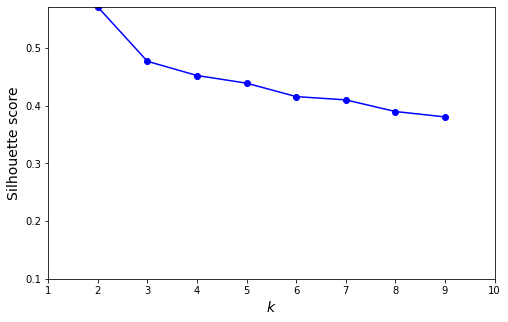

In [ ]:
silhouetteLine(silhouette_scores=silhouette_scores,k_range=len(silhouette_scores)+2)

untuk silluette score jika ditinjau dengan *line chart*,segmentasi **2 klaster** memiliki silouette score tertinggi, dan klaster 3 bisa menjadi alternatif

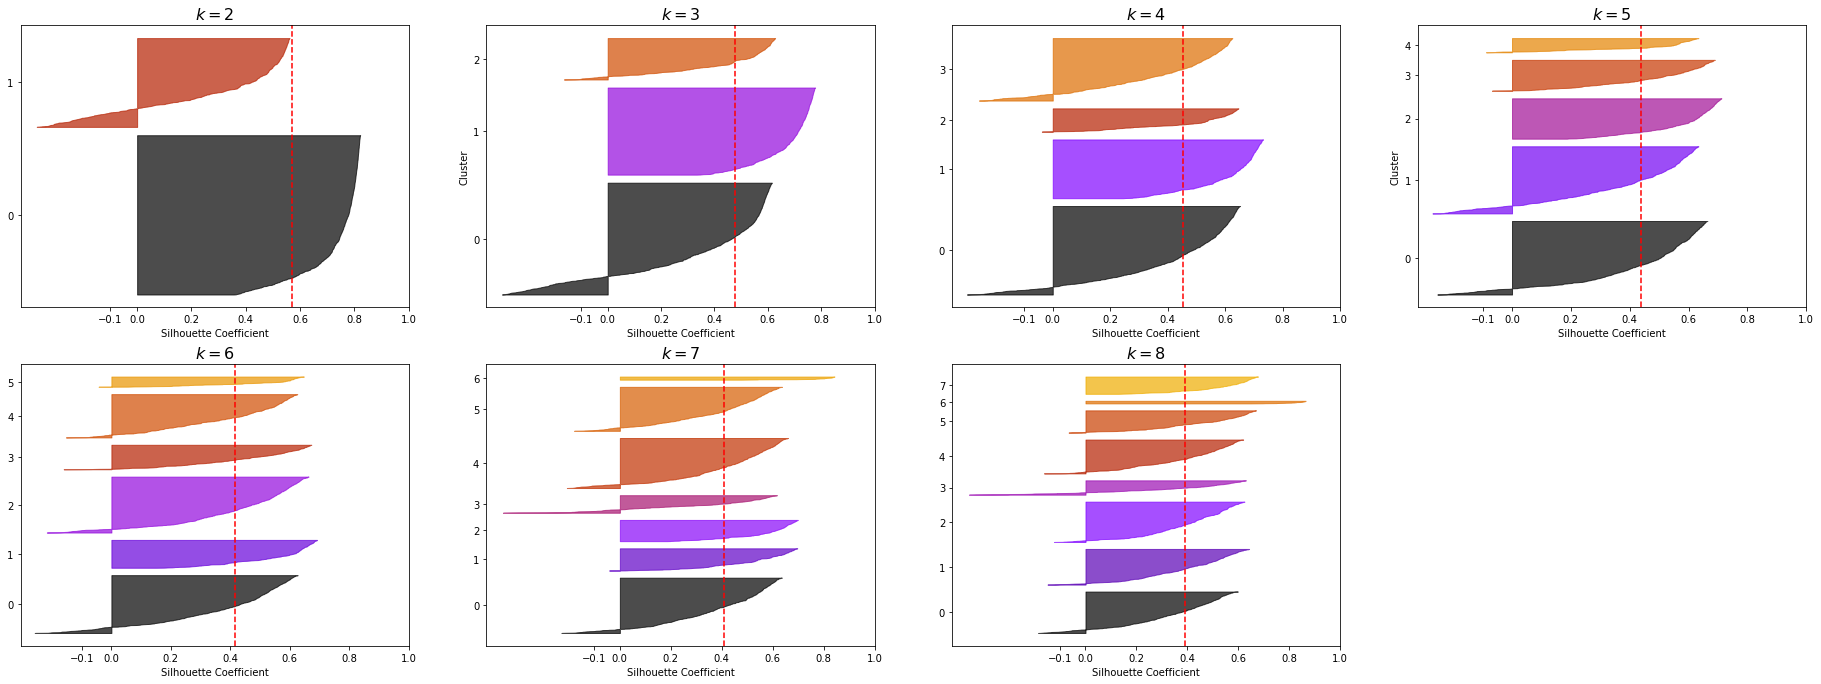

In [ ]:
silhouettePlot(kmeans_per_k=spectral_per_k,silhouette_scores=silhouette_scores,max_k=8,size=(32,55),cols=4)

jika dilihat pada klaster 2 pada labhel 1 belum menyentuh **silhouette score**.  pada **segmentasi 5 klaster** terlihat seluruh label menyentuh garis merah atau **silhouette score**, dan terlihat lebih konsisten, namun pada klaster 4 dapat terlihat cukup konsisten dan memiliki **silhouette score** yang sama. 

maka dicoba untuk evaluasi dengan PCA 2D dengan **nilai K = 4** dan **nilai K = 5** 

## Gaussian Mixture

algoritma pilihan ke-2 ialah **Gaussian Mixture**, tetapi sebelum menentukan model dengan para meter yang tepat, harus **mencari bunyak nilai klaster** yang tepat juga. **Berbeda** dari **K means** dan **Spectral Clustering** untuk menentukan banyak klaster atau **nilai K** dilakukan dengan mengevaluasi nilai **AIC dan BIC** yang paling rendah

In [ ]:
gms_per_k = [GaussianMixture(n_components=k, n_init=15,covariance_type='spherical', random_state=42).fit(features_reduced)
             for k in range(1, 20)]

c:\Users\ajies\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\ajies\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\ajies\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\ajies\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

### BIC & AIC

In [ ]:
bics = [model.bic(features_reduced) for model in gms_per_k]
aics = [model.aic(features_reduced) for model in gms_per_k]

for k in range(1, len(bics)):
  print('Cluster : ', k+1, '\tBIC : ', bics[k], '\tAIC : ', aics[k])

Cluster :  2 	BIC :  200201.86377493755 	AIC :  200127.41727729453
Cluster :  3 	BIC :  193557.4880004852 	AIC :  193442.95492718826
Cluster :  4 	BIC :  189382.07673909786 	AIC :  189227.45709014699
Cluster :  5 	BIC :  186901.60719404308 	AIC :  186706.90096943825
Cluster :  6 	BIC :  184600.31470265178 	AIC :  184365.52190239303
Cluster :  7 	BIC :  183496.13060729115 	AIC :  183221.25123137847
Cluster :  8 	BIC :  182143.7054004809 	AIC :  181828.73944891428
Cluster :  9 	BIC :  181677.14139720247 	AIC :  181322.08886998193
Cluster :  10 	BIC :  180568.16641759448 	AIC :  180173.02731471998
Cluster :  11 	BIC :  179929.94109328336 	AIC :  179494.71541475493
Cluster :  12 	BIC :  179593.64397074922 	AIC :  179118.33171656687
Cluster :  13 	BIC :  179333.2689855378 	AIC :  178817.87015570153
Cluster :  14 	BIC :  179137.7041139705 	AIC :  178582.2187084803
Cluster :  15 	BIC :  178810.51620581618 	AIC :  178214.944224672
Cluster :  16 	BIC :  178734.56275337652 	AIC :  178098.9041965

karena angka terlalu besar maka tampilan text **kurang begitu baik untuk mengevaluasi nilai BIC dan AIC**

untuk melihat **visualisasi** nilai **BIC dan AIC** akan dibuat *line chart*  

**Visualisasi BIC dan AIC**

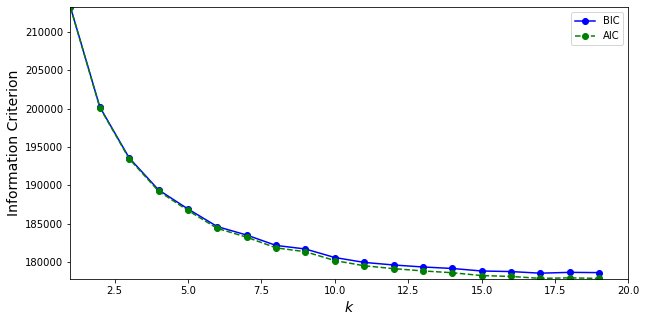

In [ ]:
bic_aic(bics=bics,aics=aics)

dari 19 percobaan jumlah klaster dari 1 hingga 19, terlihat dari jumlah **klaster 6** segmen penurunan nilai BIC dan AIC sudah tidak begitu signifikan, namun nilai **terendah ada pada 15**

nantinya akan dibandingkan pada evaluasi dengan PCA 2D dengan **nilai K = 6** dan **nilai K = 15** 

## DBSCAN

evaluasi pemilihan **hyperparameter** **sangat berbeda pada DBSCAN dari yang lain**, karena DBSCAN akan mencari banyak segmentasi klaster, akan tetapi **nilai epsilon dan minimum sample sangat sensitif untuk menentukan banyak segmentasi**

Sangat **tidak direkomendasi** menggunakan **DBSCAN** untuk **persebaran PCA 2D** yang terdapat pada kasus ini

In [ ]:

dbs_per_eps = [DBSCAN(eps=eps, min_samples=10).fit(features_reduced)
             for eps in range(600, 620)]

In [ ]:
# creating an array of true and false as the same size as db.labels
for dbs in dbs_per_eps:
    labels = dbs.labels_
    unique, counts = np.unique(labels, return_counts=True)
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
    n_noise_ = list(labels).count(-1)  # calculating the number of clusters
    dict_dbs = dict(zip(unique, counts))
    fin_max = max(dict_dbs, key=dict_dbs.get)
    print("Maximum value at label ",fin_max, "ratio :",dict_dbs[fin_max]/len(features_reduced))
    print("Labels :",unique)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("=================================================================")


Maximum value at label  0 ratio : 0.7411816578483245
Labels : [-1  0  1  2]
Estimated number of clusters: 3
Estimated number of noise points: 436
Maximum value at label  0 ratio : 0.7420634920634921
Labels : [-1  0  1  2  3]
Estimated number of clusters: 4
Estimated number of noise points: 423
Maximum value at label  0 ratio : 0.7420634920634921
Labels : [-1  0  1  2  3]
Estimated number of clusters: 4
Estimated number of noise points: 423
Maximum value at label  0 ratio : 0.7425044091710759
Labels : [-1  0  1  2  3]
Estimated number of clusters: 4
Estimated number of noise points: 422
Maximum value at label  0 ratio : 0.7433862433862434
Labels : [-1  0  1  2  3]
Estimated number of clusters: 4
Estimated number of noise points: 419
Maximum value at label  0 ratio : 0.7433862433862434
Labels : [-1  0  1  2  3]
Estimated number of clusters: 4
Estimated number of noise points: 419
Maximum value at label  0 ratio : 0.7433862433862434
Labels : [-1  0  1  2  3]
Estimated number of clusters: 

terlalu **banyak label 0**, persentase banyaknya semua 99% jika digunakan algoritma **DBSCAN** bahkan digunakan **epsilon 2000** sekalipun, DBSCAN tidak untuk digunakan pada kasus ini, akan tetapi akan ditampilkan pada evaluasi untuk melihat hasilnya.

diluar dari itu untuk mengurangi jumlah noise / outliers palingoptimal , digunakan `min_samples` = 2 dan `eps` sekitaran 2100 hingga 2200

# VII. Model Training

## Training KMeans

**KMeans** dengan parameter dengan jumlah klaster atau **nilai K** yang terbaik

In [ ]:

best_k_means = KMeans(n_clusters=5, random_state=42).fit(features_reduced)

## Training Spectral Cluster

model Spectral Cluster dengan menggunakan **jumlah klaster** atau **nilai K** terbaik

In [ ]:
# model dengan nilai k yang optimal
best_sc_5 = SpectralClustering(n_clusters=5,n_neighbors=20,eigen_tol=.01,n_jobs=8,
                             affinity='nearest_neighbors',random_state=20,
                             assign_labels='discretize').fit(features_reduced)

best_sc_4 = SpectralClustering(n_clusters=4,n_neighbors=20,eigen_tol=.01,n_jobs=8,
                             affinity='nearest_neighbors',random_state=20,
                             assign_labels='discretize').fit(features_reduced)

## Gaussian Mixture
Gaussian Mixture dengan parameter klaster atau **nilai K** terbaik 

In [ ]:
best_gmx_6 = GaussianMixture(n_components=6, n_init=5,covariance_type='spherical',random_state=42).fit(features_reduced)
best_gmx_15 = GaussianMixture(n_components=15, n_init=5,covariance_type='spherical',random_state=42).fit(features_reduced)

## DBSCAN

DBSCAN dengan parameter **epsilon dan minimal sample** terbaik

In [ ]:
db_best=DBSCAN(eps=1120, min_samples=2).fit(features_reduced)

# VIII. Model Evaluation

akan dilakukan visualisasi PCA dengan nilai komponen 2 dimensi 

### Evaluasi K Means

jika sudah ditemukan Kmeans dengan parameter yang optimal, maka dilakukan **evaluasi** untuk melihat apakah **antara segmen** atau klaster adayang **tumpang tindih**

Text(0.5, 1.0, 'Kmeans k = 6')

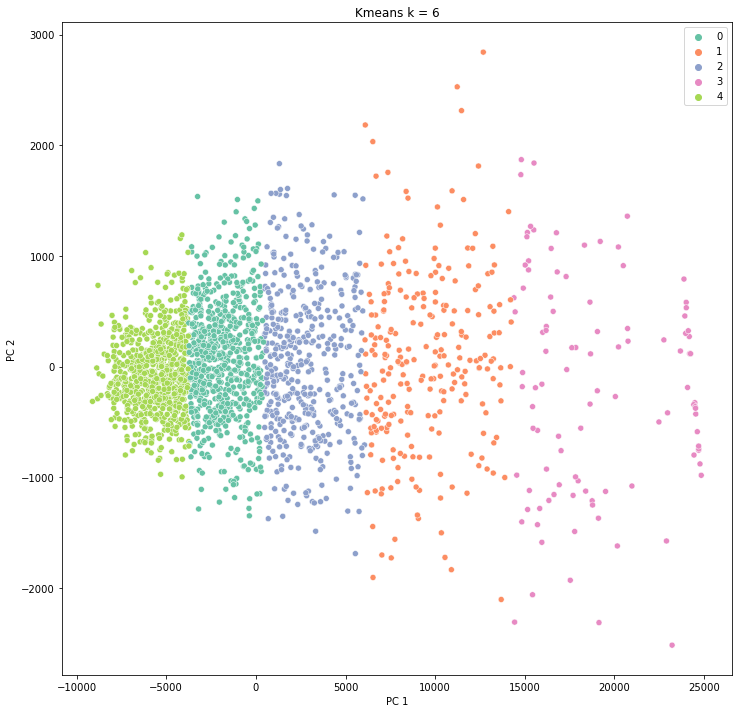

In [ ]:
rcParams['figure.figsize'] = 12,12
pca2d=PCA(n_components=2).fit(features)
pca2d_trans=pca2d.transform(features)

fig,ax=plt.subplots(figsize=(12,12))
sns.scatterplot(x=pca2d_trans[:,0],y=pca2d_trans[:,1],hue=best_k_means.labels_,palette=sns.color_palette("Set2", 5))
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Kmeans k = 6')
# ,palette=sns.color_palette("viridis", as_cmap=True)

segmentasi sudah terlihat sangat baik, dan **sangat sedikit** antar klaster yang tumpang tindih

jadikan label hasil clustering KMeans menjadi **dataframe** 

In [ ]:
# concate feature best_k_means.labels_
df_km = pd.DataFrame(best_k_means.labels_, columns=["kmeans_cluster"])

### Evaluasi Spectral Cluster

jika sudah ditemukan algoritma Spectral Cluster dengan parameter yang optimal, maka dilakukan **evaluasi** untuk melihat apakah **antara segmen** atau klaster adayang **tumpang tindih**

Text(0.5, 1.0, 'Spectral Cluster K = 4')

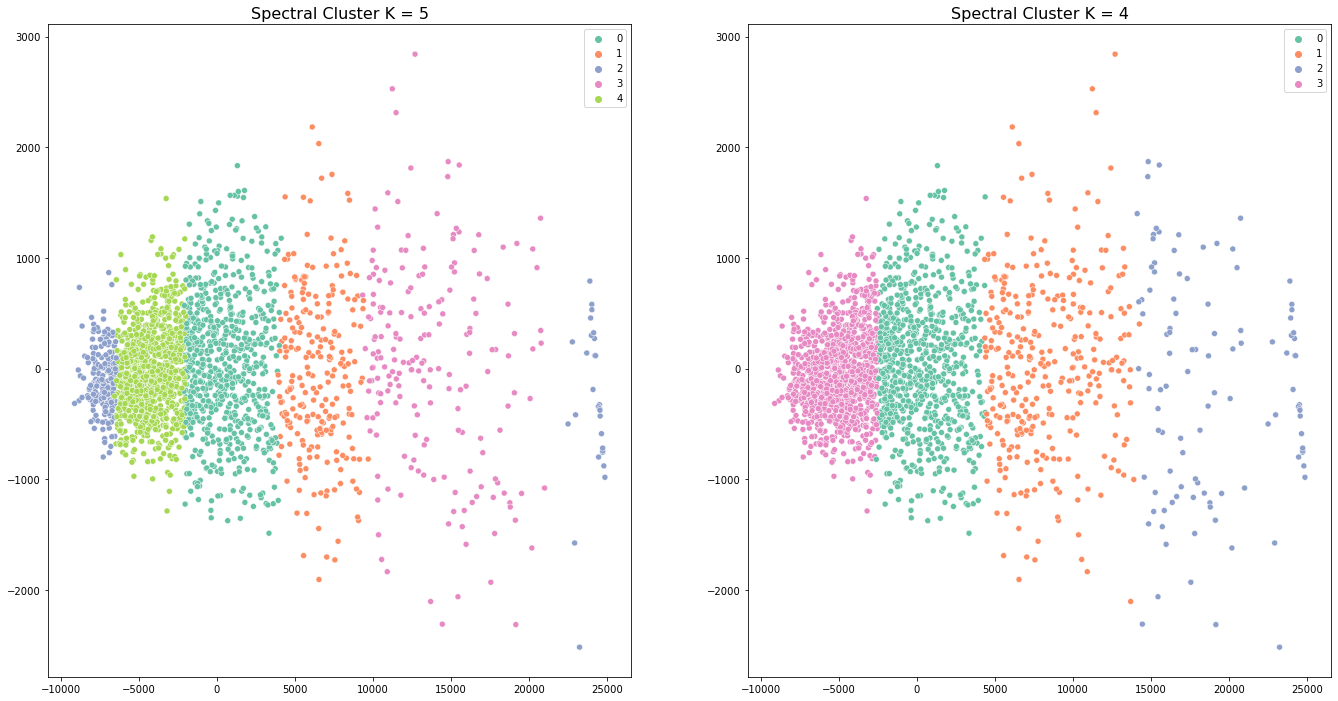

In [ ]:

pca2d=PCA(n_components=2).fit(features)

pca2d_trans=pca2d.transform(features)
# sns.scatterplot(x=pca2d_trans[:,0],y=pca2d_trans[:,1],hue=best_sc_5.labels_, palette=sns.color_palette("Set2", 5))
# ax.set_xlabel('PC 1')
# ax.set_ylabel('PC 2')
# ax.set_title('Feature Spectral Cluster')

fig,ax = plt.subplots(ncols= 2,figsize=(23,12))

sns.scatterplot(x=pca2d_trans[:,0],y=pca2d_trans[:,1],hue=best_sc_5.labels_, palette=sns.color_palette("Set2", 5),ax=ax[0])
ax[0].set_title('Spectral Cluster K = 5',fontsize= 16)

sns.scatterplot(x=pca2d_trans[:,0],y=pca2d_trans[:,1],hue=best_sc_4.labels_, palette=sns.color_palette("Set2", 4),ax=ax[1])
ax[1].set_title('Spectral Cluster K = 4',fontsize= 16)

meskipun sekilas terlihat rapi, akan tetapi ada sebagian kecil **data point saling tupang tindih** antar label. 

jadikan hasil klaster menjadi **dataframe**

In [ ]:
df_sc = pd.DataFrame(best_sc_4.labels_, columns=["spectral_cluster"])

### Evaluasi Gaussian Mixture

jika sudah ditemukan algoritma Gaussian Mixture dengan parameter yang optimal, maka dilakukan **evaluasi** untuk melihat apakah **antara segmen** atau klaster adayang **tumpang tindih**

In [ ]:
gmx_result_6 = best_gmx_6.predict(features_reduced)
gmx_result_15 = best_gmx_15.predict(features_reduced)

Text(0.5, 1.0, 'Gaussian Mixture K = 15')

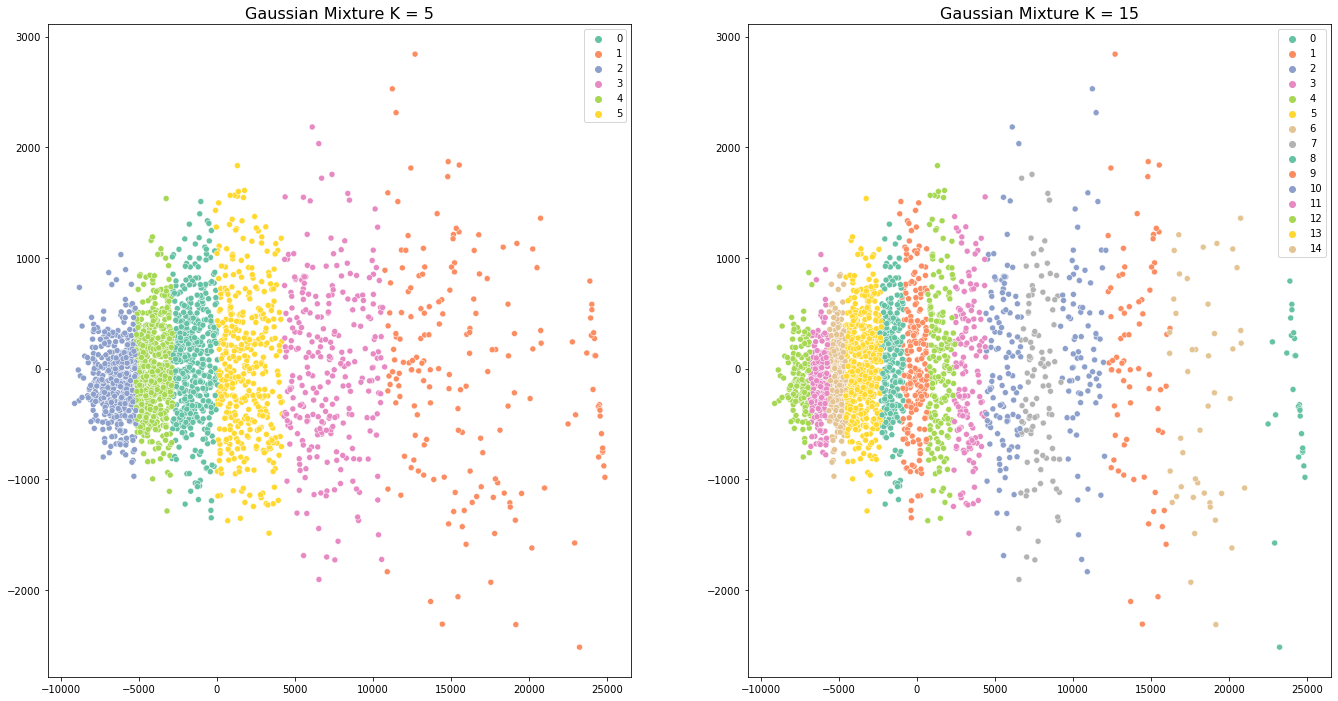

In [ ]:
fig,ax = plt.subplots(ncols= 2,figsize=(23,12))

sns.scatterplot(x=pca2d_trans[:,0],y=pca2d_trans[:,1],hue=gmx_result_6, palette=sns.color_palette("Set2", 6),ax=ax[0])
ax[0].set_title('Gaussian Mixture K = 5',fontsize= 16)

sns.scatterplot(x=pca2d_trans[:,0],y=pca2d_trans[:,1],hue=gmx_result_15, palette=sns.color_palette("Set2", 15),ax=ax[1])
ax[1].set_title('Gaussian Mixture K = 15',fontsize= 16)
# palette=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

sepertinya gaussian kurang cocok untuk persebaran data point yang ceperti di kasus ini. dikarenakan sulit mendapatkan hasil label yang tidak saling tumpang tindih

jadikan hasil klaster dari  gaussian mixture menjadi **dataframe**

In [ ]:
df_gm = pd.DataFrame(gmx_result_6, columns=["gaussian_mix"])

## DBSCAN

untuk melihat hasil **DBSCAN** evaluasi menggunakan PCA

Text(0.5, 1.0, 'Feature Scaled')

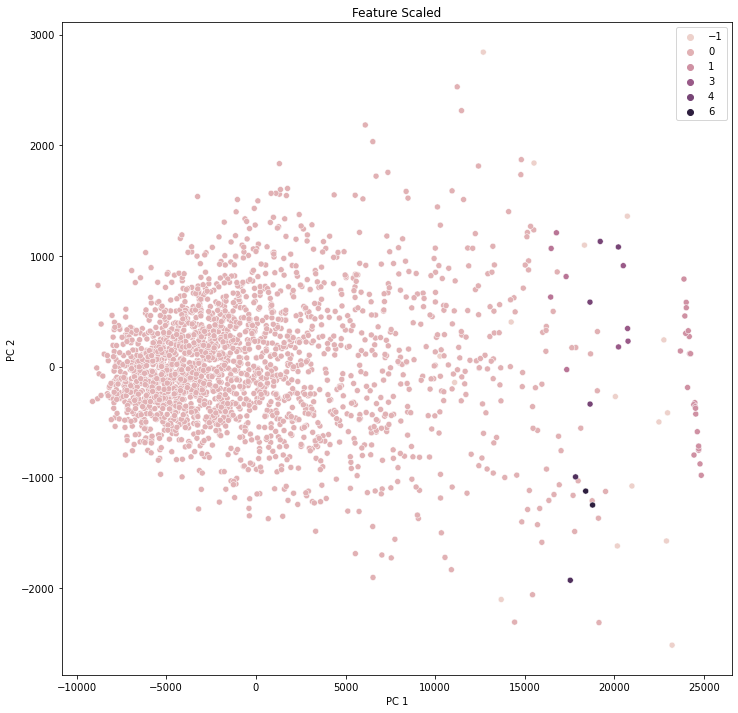

In [ ]:

pca2d=PCA(n_components=2).fit(features)

pca2d_trans=pca2d.transform(features)

fig,ax=plt.subplots(figsize=(12,12))
sns.scatterplot(x=pca2d_trans[:,0],y=pca2d_trans[:,1],hue=db_best.labels_)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Feature Scaled')

dapat dilihat **DBSCAN** sangat kesulitan untuk membagi segmentasi jika persebaran data secara **scatter plot** seperti gambar diatas.

hasil label **didominasi** oleh **label 0**

## Gabungkan semua hasil segmentasi

dikarenakan hasil selain dari **K means yang paling bagus** dari semua algoritma yang dicoba maka **label dari prediksi Spectral Clustering saja** yang dipakai untuk Eksplorasi Data Lanjutan

data hasil dari *Clustering* **Spectral Clustering** akan digabungkan dengan data feature lain dan nantinya akan dilakukan analisa lanjutan

In [ ]:
# reset index untuk menghindari error berkelanjutan
non_inference.reset_index(drop=True,inplace=True)

In [ ]:
df_final = pd.concat([non_inference,df_gm],axis=1)

In [ ]:
df_final

,Unnamed: 0,result,formation,team,opponent,venue,date,pass_live_shot,pass_dead_shot,drib_shot,pk,fk,pass_prog,pass_prg_dist,pass_tot_dist,pass,ground,low,high,carries,carr_tot_dist,carr_prg_dist,carr_att_3rd,att_pen,press,press_succ,gaussian_mix
0,0,W,3-4-3,Arsenal,Leicester City,Home,2017-08-11,39,4,2,0,0,36,2100,6264,319,513,30,116,360,2289,1154,109,16,474,126,4
1,1,L,3-4-3,Arsenal,Stoke City,Away,2017-08-19,22,2,0,0,0,36,2304,7285,351,611,24,110,380,2014,956,118,22,152,46,4
2,2,L,3-4-3,Arsenal,Liverpool,Away,2017-08-27,8,1,1,0,1,50,3193,8722,473,395,49,110,512,2976,1700,200,25,430,120,0
3,3,W,3-4-3,Arsenal,Bournemouth,Home,2017-09-09,23,0,1,0,0,65,3543,10863,546,449,29,136,583,2305,1064,227,41,312,96,5
4,4,D,3-4-3,Arsenal,Chelsea,Away,2017-09-17,12,0,1,0,1,50,3192,10302,533,351,29,152,526,2955,1355,177,25,374,62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,2275,L,3-4-3,Wolves,Sheffield Utd,Away,2020-07-08,18,3,3,0,3,93,8787,29691,1407,996,345,414,1236,8304,4653,399,42,122,43,1
2264,2276,W,3-4-3,Wolves,Everton,Home,2020-07-12,36,6,9,3,0,117,9015,32103,1530,1287,225,270,1368,7923,4656,453,48,144,22,1
2265,2277,D,3-4-3,Wolves,Burnley,Away,2020-07-15,39,6,12,0,0,120,7167,21924,1026,687,261,420,912,6159,3894,441,66,121,39,1
2266,2278,W,3-4-3,Wolves,Crystal Palace,Home,2020-07-20,33,6,6,0,0,87,8358,25200,1197,822,225,450,1119,5979,3072,438,57,152,44,1


Data yang telah mendapat label ini akan dilakukan **EDA lebih lanjut**

## Pipeline Untuk Model Terpilih

Model Yang dipilih adalah Gaussian Mixture dengan **6 lable klaster**

In [ ]:
gaussian_pipe = make_pipeline(MinMaxScaler(),PCA(n_components=6),GaussianMixture(n_components=6, n_init=5,covariance_type='spherical',random_state=42).fit(features_reduced))

train model

In [ ]:
gaussian_pipe.fit(features_clean)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('pca', PCA(n_components=6)),
                ('gaussianmixture',
                 GaussianMixture(covariance_type='spherical', n_components=6,
                                 n_init=5, random_state=42))])

## Export Model Pipeline

In [ ]:
with open("epl_play_model.pkl", "wb") as model_file:
  pickle.dump(gaussian_pipe, model_file)

# IX. EDA Lanjutan

dalam EDA Lanjutan ini Merupakan eksplorasi untuk **melihat relasi** label hasil dari *clustering* dengan **data feature**.

## Penguasaan Bola

Penguasaan Bola dari rata-rata banyak sentuhan setiap pertandingannya

Text(0.5, 1.0, 'Rata-Rata Umpan pada Label')

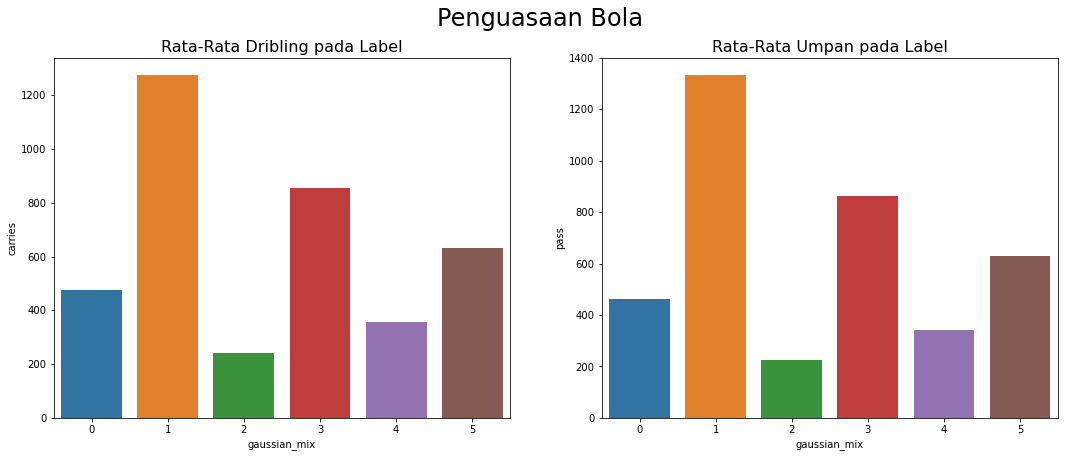

In [ ]:
judul = 'Penguasaan Bola'

fig,ax = plt.subplots(ncols=2,figsize=(18,7))
fig.suptitle(judul,fontsize=24, y=.94)
fig.subplots_adjust(top=.84)
fig.subplots_adjust(hspace=.6)

sns.barplot( data=df_final,x='gaussian_mix',y='carries',ax=ax[0],ci=None)
ax[0].set_title('Rata-Rata Dribling pada Label',fontsize= 16)

sns.barplot(data=df_final,x='gaussian_mix',y='pass',ax=ax[1],ci=None)
ax[1].set_title('Rata-Rata Umpan pada Label',fontsize= 16)


pada **label 3** terlihat disitu adalah label yang paling **sering menguasai bola**,sedangkan **label 4** menjadi label yang **paling tidak** menguasai bola. 

## Label Dan Permainan Progresif

melihat apa hubungan label dan progresifitas pergerakan bola, untuk melihat label mana yang cenderung melakukan permainan yang progressif.

Text(0.5, 1.0, 'Ratio Dribling pada kotak penalty Lawan')

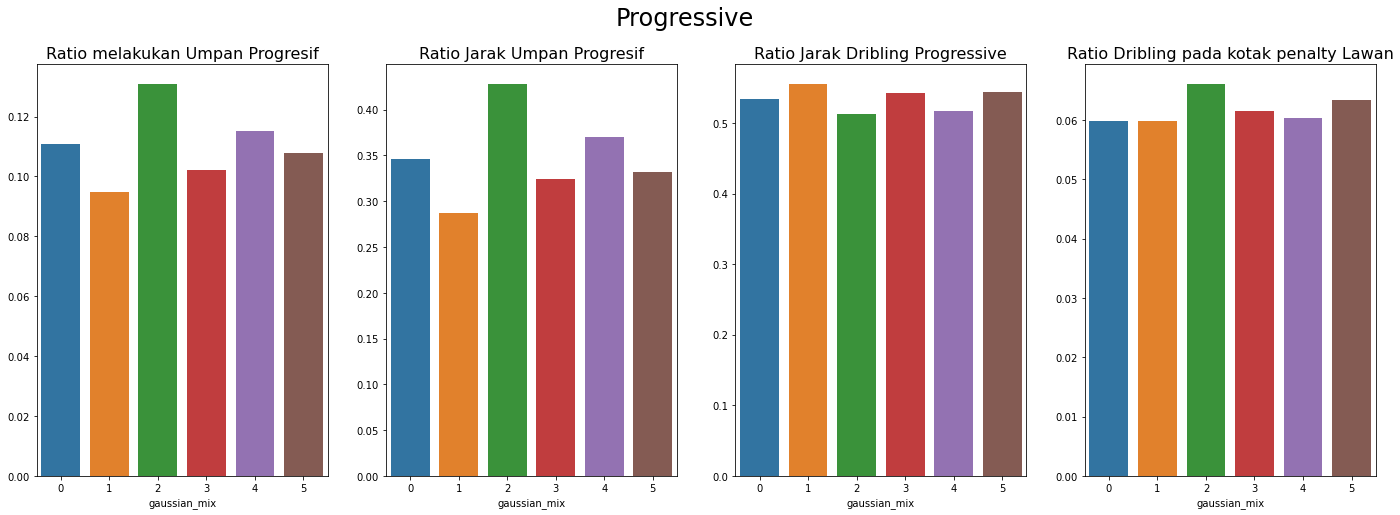

In [ ]:
# fungsi untuk mencari ratio antara umpan progressive dari total banyak umpan
def progressive_rat(x):
    prog_percent = x['pass_prog'].sum()/x['pass'].sum()
    return prog_percent
# fungsi untuk mencari ratio antara jarak umpan progressive dari total jarak umpan
def progressive_dist_rat(x):
    prog_percent = x['pass_prg_dist'].sum()/x['pass_tot_dist'].sum()
    return prog_percent

# fungsi untuk mencari ratio antara jarak dribling  dan jarak dribling yang progresif
def progressive_dist_rat_carr(x):
    prog_percent = x['carr_prg_dist'].sum()/x['carr_tot_dist'].sum()
    return prog_percent
# fungsi untuk mencari ratio antara jarak dribling  dan jarak dribling berada di kotak penalti
def pen_dist_rat_carr(x):
    prog_percent = x['att_pen'].sum()/x['carries'].sum()
    return prog_percent

# melakukan aggregasi ratio pass action
g_prog_rat = df_final.groupby('gaussian_mix').apply(progressive_rat)
g_prog_rat.sort_values(inplace=True,ascending=False)
# melakukan aggregasi ratio pass distance
g_prog_dist_rat = df_final.groupby('gaussian_mix').apply(progressive_dist_rat)
g_prog_dist_rat.sort_values(inplace=True,ascending=False)

# melakukan aggregasi ratio carries distance
g_prog_rat_carr = df_final.groupby('gaussian_mix').apply(progressive_dist_rat_carr)
g_prog_rat_carr.sort_values(inplace=True,ascending=False)
# melakukan aggregasi ratio 
g_pen_carr_rat = df_final.groupby('gaussian_mix').apply(pen_dist_rat_carr)
g_pen_carr_rat.sort_values(inplace=True,ascending=False)

#tampilan plot
fig,ax = plt.subplots(ncols=4,figsize=(24,8))
fig.suptitle("Progressive",fontsize=24, y=.94)
fig.subplots_adjust(top=.84)
fig.subplots_adjust(hspace=.6)

sns.barplot(x=g_prog_rat.index,y=g_prog_rat,ax=ax[0],ci=None)
ax[0].set_title('Ratio melakukan Umpan Progresif',fontsize= 16)

sns.barplot(x=g_prog_dist_rat.index,y=g_prog_dist_rat,ax=ax[1],ci=None)
ax[1].set_title('Ratio Jarak Umpan Progresif',fontsize= 16)

#tampilan plot
sns.barplot(x=g_prog_rat_carr.index,y=g_prog_rat_carr,ax=ax[2],ci=None)
ax[2].set_title('Ratio Jarak Dribling Progressive',fontsize= 16)

sns.barplot(x=g_pen_carr_rat.index,y=g_pen_carr_rat,ax=ax[3],ci=None)
ax[3].set_title('Ratio Dribling pada kotak penalty Lawan',fontsize= 16)



pada **label 4** cenderung **melakukan permainan yang sangat progressive** dari segi melakukan umpan. namun pada jarak dribling progressive label 3 relative lebih sering melakukan dribling progressive.

namun ketika di kotak penalty lawan label 4 lebih sering melakukan dribling.

## Pressing

Melihat hubungan label hasil clustering intensitas pressing terhadap lawan 

Text(0.5, 1.0, 'Rasio Pressing Berhasil')

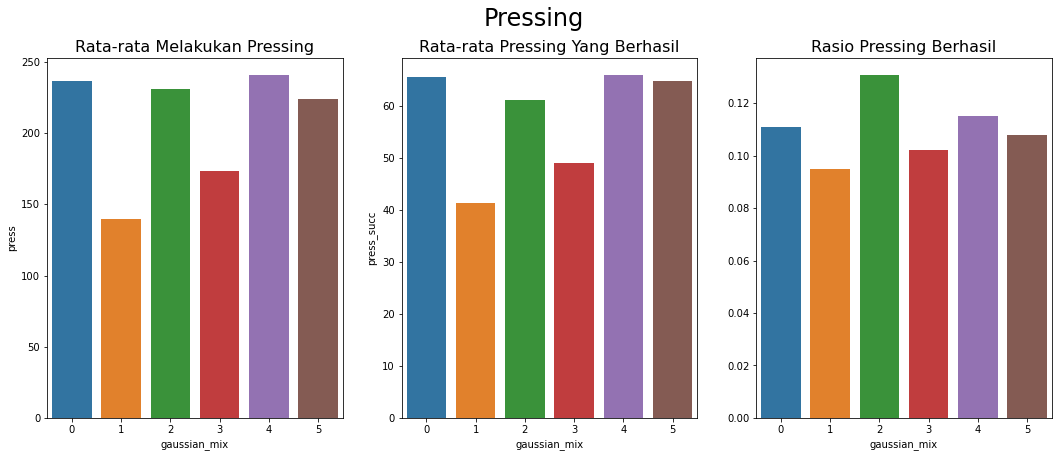

In [ ]:
def succ_pressing_rat(x):
    percent = x['press_succ']/x['press']
    return percent

g_press_rat = df_final.groupby('gaussian_mix').apply(succ_pressing_rat)
g_press_rat.sort_values(inplace=True,ascending=False)

judul = 'Pressing'

fig,ax = plt.subplots(ncols=3,figsize=(18,7))
fig.suptitle(judul,fontsize=24, y=.94)
fig.subplots_adjust(top=.84)
fig.subplots_adjust(hspace=.6)

sns.barplot( data=df_final,x='gaussian_mix',y='press',ax=ax[0],ci=None)
ax[0].set_title('Rata-rata Melakukan Pressing',fontsize= 16)

sns.barplot(data=df_final,x='gaussian_mix',y='press_succ',ax=ax[1],ci=None)
ax[1].set_title('Rata-rata Pressing Yang Berhasil',fontsize= 16)

sns.barplot(data=df_final,x=g_prog_rat.index,y=g_prog_rat,ax=ax[2],ci=None)
ax[2].set_title('Rasio Pressing Berhasil',fontsize= 16)

pada label 2 dan 3 cenderung **tidak terlalu** intens melakukan pressing, sedangkan pada  **label 0, 1, 4, dan 5** sangat intens melakukan pressing, namun hanya **label 4** yang memiliki **rasio kesuksesan pressing** yang paling tinggi.

## Label dan Team Sepakbola

melihat **team** mana saja yang bermain berdasarkan pola label hasil **clusterring**

In [ ]:
# memilih data dengan label masing-masing dan hitung jumlah team
df_0 = df_final.query("gaussian_mix == 0").value_counts('team')
df_1 = df_final.query("gaussian_mix == 1").value_counts('team')
df_2 = df_final.query("gaussian_mix == 2").value_counts('team')
df_3 = df_final.query("gaussian_mix == 3").value_counts('team')
df_4 = df_final.query("gaussian_mix == 4").value_counts('team')
df_5 = df_final.query("gaussian_mix == 5").value_counts('team')

Text(0.5, 1.0, 'Team yang memiliki label 5')

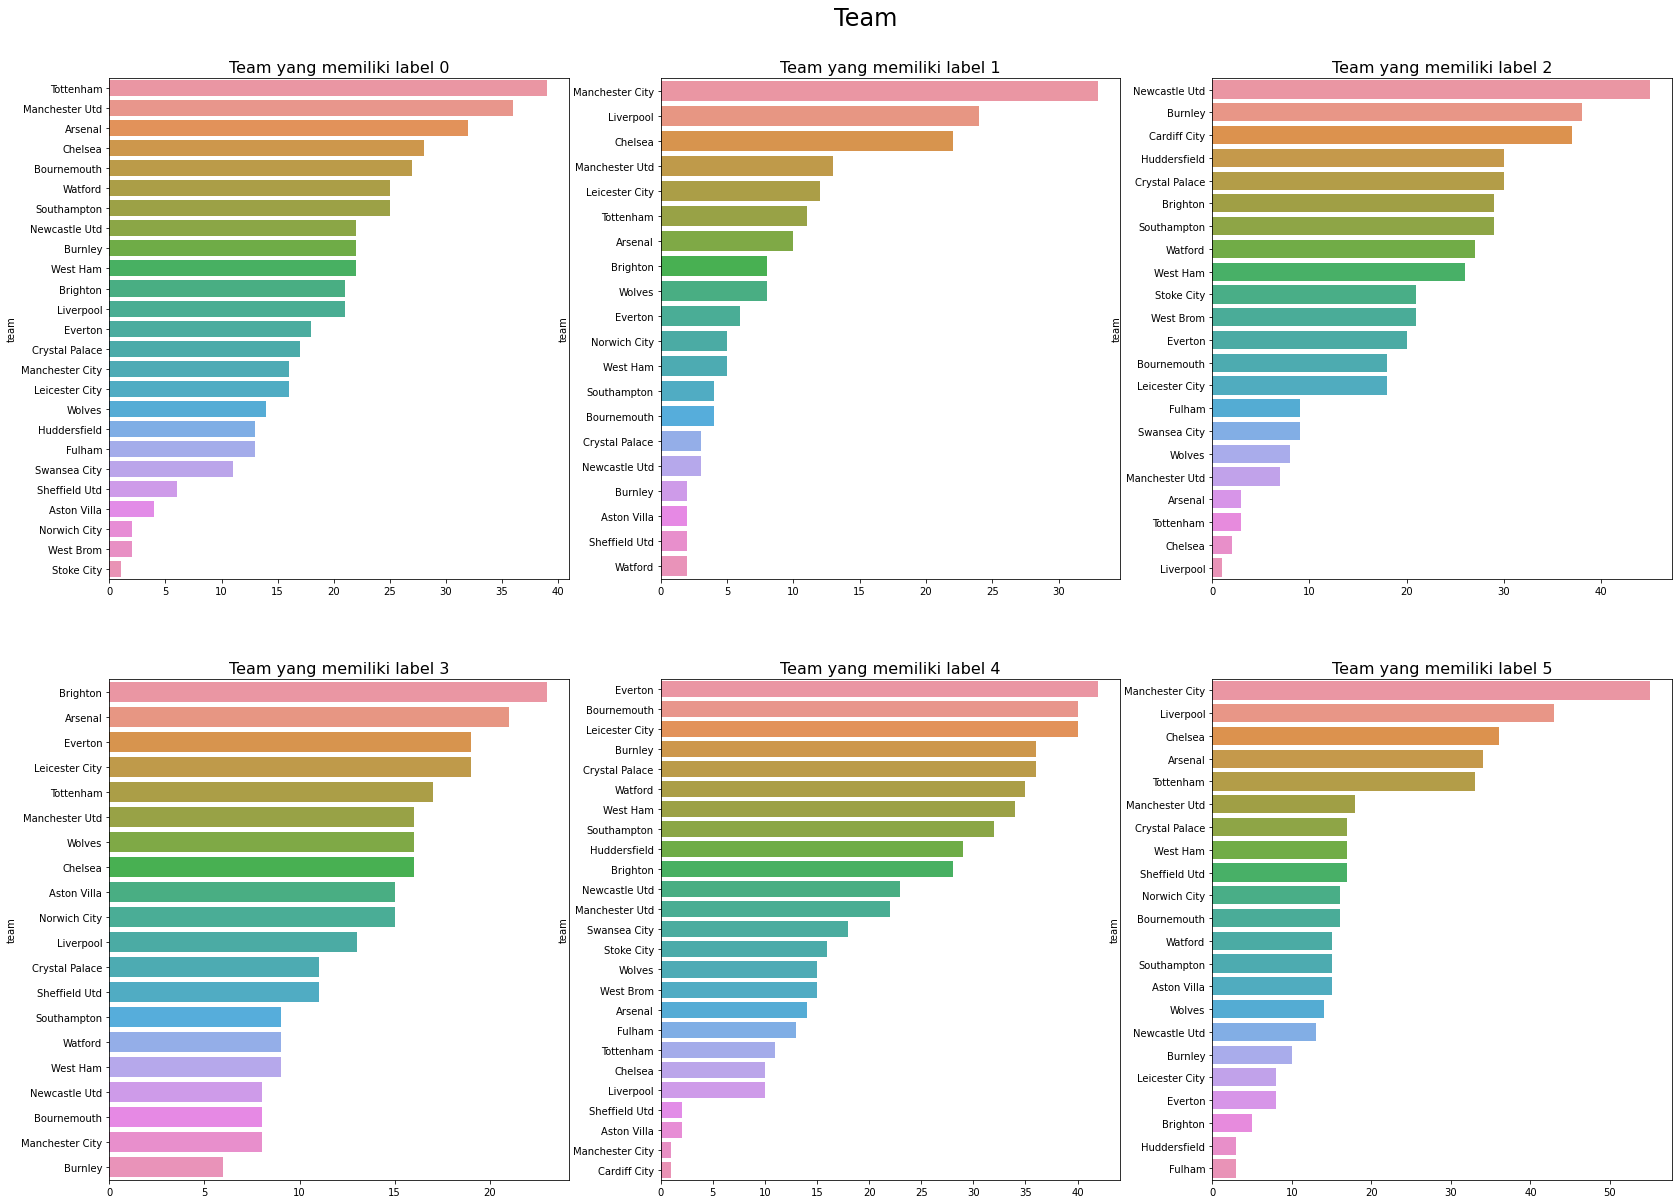

In [ ]:
# tampilkan visualisasi pada masing-masing label dan team
fig,ax = plt.subplots( nrows=2,ncols=3,figsize=(28,20))
fig.suptitle('Team',fontsize=24, y=.94)
fig.subplots_adjust(top=.89)
fig.subplots_adjust(hspace=.2)

sns.barplot(y=df_0.index,x=df_0,ax=ax[0,0],ci=None)
ax[0,0].set_title('Team yang memiliki label 0',fontsize= 16)

sns.barplot(y=df_1.index,x=df_1,ax=ax[0,1],ci=None)
ax[0,1].set_title('Team yang memiliki label 1',fontsize= 16)

sns.barplot(y=df_2.index,x=df_2,ax=ax[0,2],ci=None)
ax[0,2].set_title('Team yang memiliki label 2',fontsize= 16)

sns.barplot(y=df_3.index,x=df_3,ax=ax[1,0],ci=None)
ax[1,0].set_title('Team yang memiliki label 3',fontsize= 16)

sns.barplot(y=df_4.index,x=df_4,ax=ax[1,1],ci=None)
ax[1,1].set_title('Team yang memiliki label 4',fontsize= 16)

sns.barplot(y=df_5.index,x=df_5,ax=ax[1,2],ci=None)
ax[1,2].set_title('Team yang memiliki label 5',fontsize= 16)

jika dilihat pada team sepakbola **Big 6** lebih **banyak** memiliki **label 0 dan 3**, namun ada **beberapa** juga yang banyak memiliki **label 5** seperti Tottenham, Arsenal ,Chelsea ,dan Manchester United.

namun pada team papan **menengah dan menengah kebawah** lebih condong memiliki **label 1 dan 4**.

## Label Terhadap Lawan

menghitung **macam team lawan** pada masing-masing label, untuk melihat bahwa **pola permainan** label tersebut sering digunakan pada lawan tertentu.

In [ ]:
# memilih data dengan label masing-masing dan hitung jumlah lawan
df_0 = df_final.query("gaussian_mix == 0").value_counts('opponent')
df_1 = df_final.query("gaussian_mix == 1").value_counts('opponent')
df_2 = df_final.query("gaussian_mix == 2").value_counts('opponent')
df_3 = df_final.query("gaussian_mix == 3").value_counts('opponent')
df_4 = df_final.query("gaussian_mix == 4").value_counts('opponent')
df_5 = df_final.query("gaussian_mix == 5").value_counts('opponent')

Text(0.5, 1.0, 'lawan dengan pola label 5')

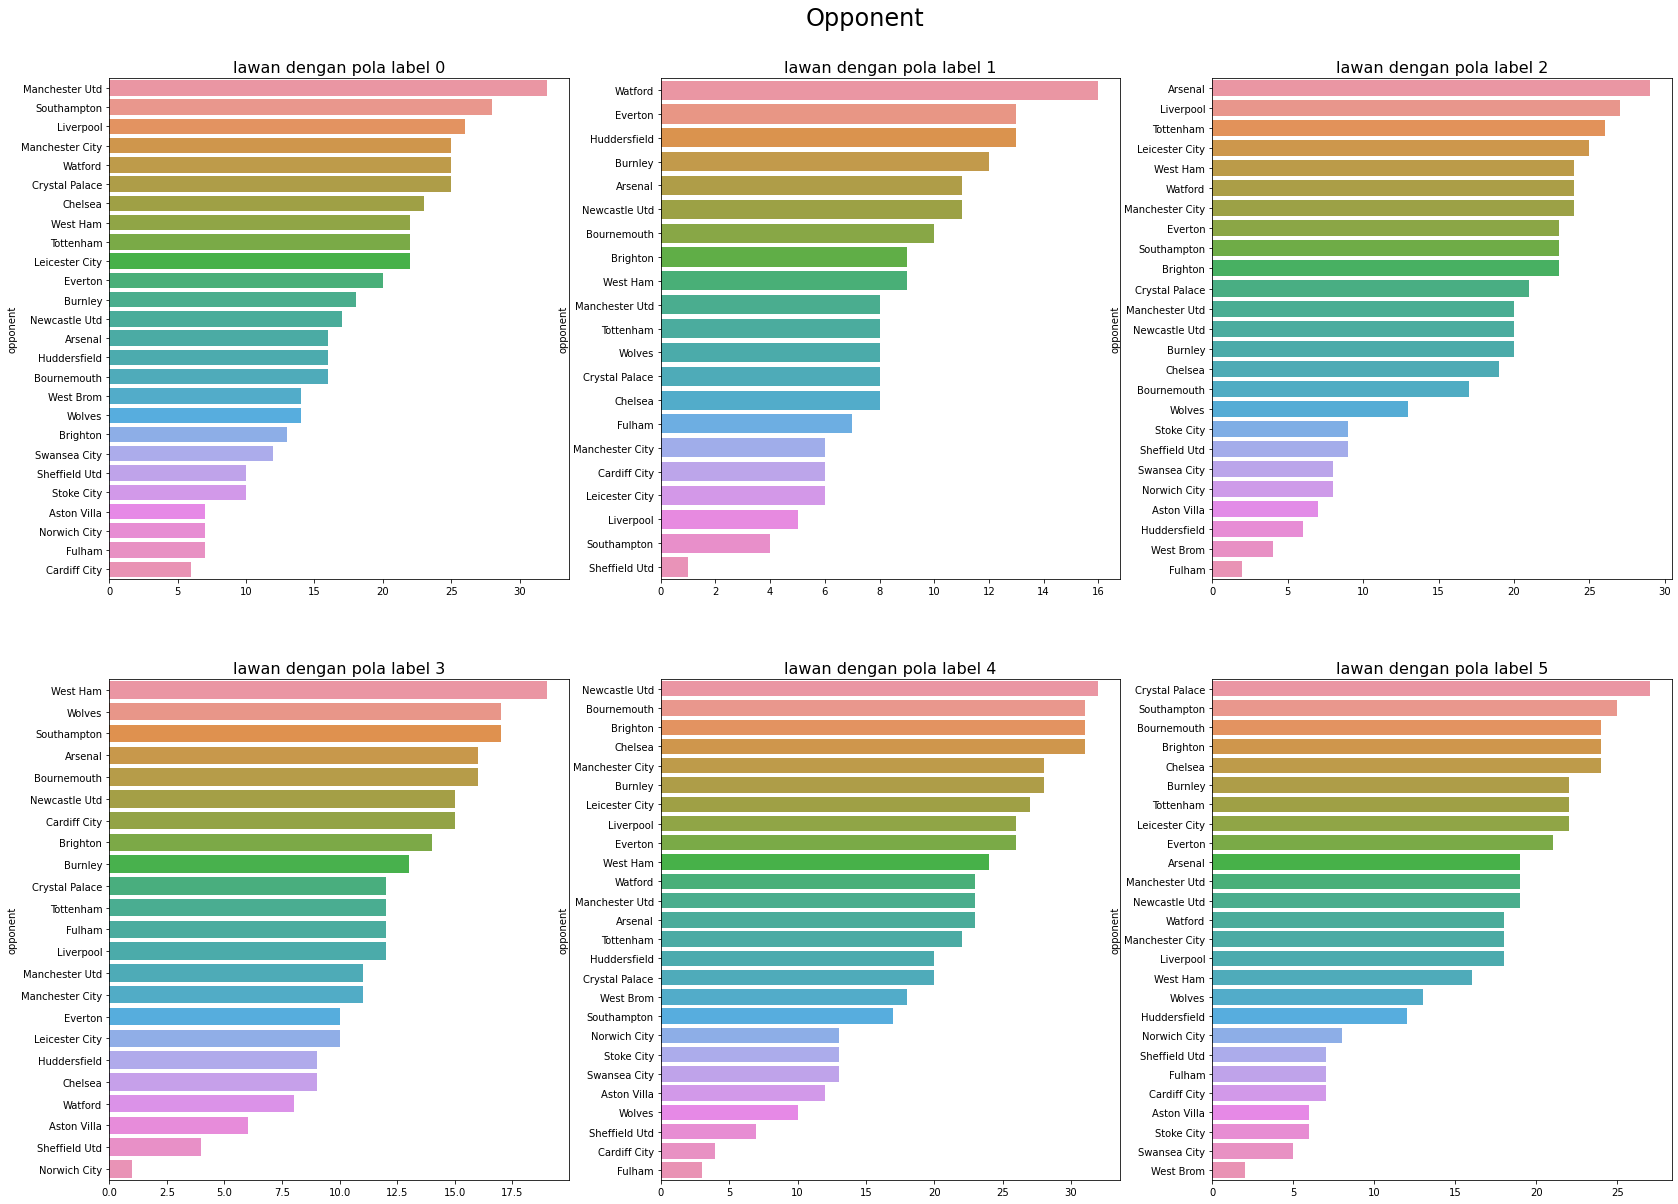

In [ ]:
fig,ax = plt.subplots( nrows=2,ncols=3,figsize=(28,20))
fig.suptitle('Opponent',fontsize=24, y=.94)
fig.subplots_adjust(top=.89)
fig.subplots_adjust(hspace=.2)

sns.barplot(y=df_0.index,x=df_0,ax=ax[0,0],ci=None)
ax[0,0].set_title('lawan dengan pola label 0',fontsize= 16)

sns.barplot(y=df_1.index,x=df_1,ax=ax[0,1],ci=None)
ax[0,1].set_title('lawan dengan pola label 1',fontsize= 16)

sns.barplot(y=df_2.index,x=df_2,ax=ax[0,2],ci=None)
ax[0,2].set_title('lawan dengan pola label 2',fontsize= 16)

sns.barplot(y=df_3.index,x=df_3,ax=ax[1,0],ci=None)
ax[1,0].set_title('lawan dengan pola label 3',fontsize= 16)

sns.barplot(y=df_4.index,x=df_4,ax=ax[1,1],ci=None)
ax[1,1].set_title('lawan dengan pola label 4',fontsize= 16)

sns.barplot(y=df_5.index,x=df_5,ax=ax[1,2],ci=None)
ax[1,2].set_title('lawan dengan pola label 5',fontsize= 16)

terlihat bahwa banyak team melawan Liverpool dan Arsenal, dengan gaya label 4, sedangkan untuk menhadapi  Manchester United sering menggunakan pola permainan label 5.

pada **Chelsea** sering dilawan dengan gaya **label 1**.

## Label Dan Formasi Sepakbola 

melihat tatanan pemain seperti apa yang terdapat pada setiap label.

In [ ]:
# filter hanya pada formasi yang paling sering digunakan setidaknya 20x digunakan
list_pop_formation
df_filter_formation = df_final.query("formation in @list_pop_formation")

# pilih masing-masing label dan hitung jumlah formasi
df_0 = df_filter_formation.query("gaussian_mix == 0").value_counts('formation')
df_1 = df_filter_formation.query("gaussian_mix == 1").value_counts('formation')
df_2 = df_filter_formation.query("gaussian_mix == 2").value_counts('formation')
df_3 = df_filter_formation.query("gaussian_mix == 3").value_counts('formation')
df_4 = df_filter_formation.query("gaussian_mix == 4").value_counts('formation')
df_5 = df_filter_formation.query("gaussian_mix == 5").value_counts('formation')

Text(0.5, 1.0, 'Formasi yang memiliki label 5')

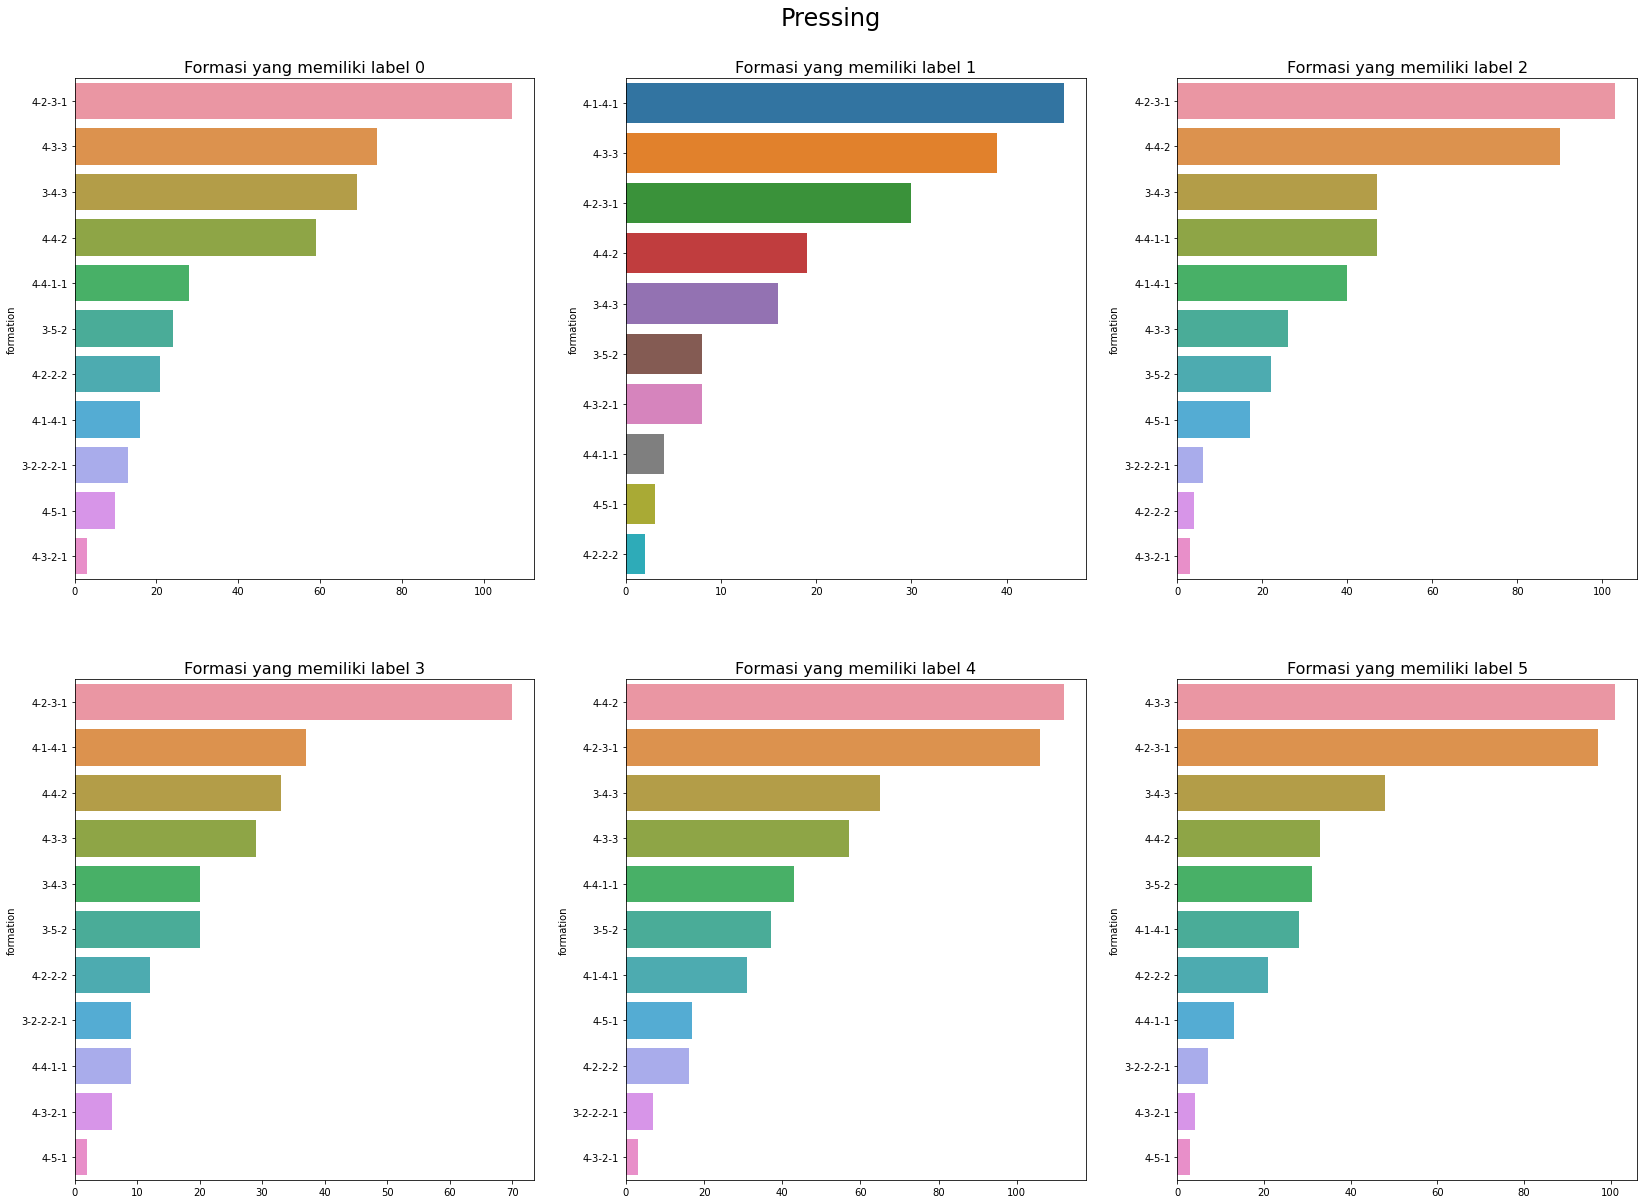

In [ ]:
# tampilkan visualisasi pada masing-masing label dan banyak formasinya
fig,ax = plt.subplots( nrows=2,ncols=3,figsize=(28,20))
fig.suptitle(judul,fontsize=24, y=.94)
fig.subplots_adjust(top=.89)
fig.subplots_adjust(hspace=.2)

sns.barplot(y=df_0.index,x=df_0,ax=ax[0,0],ci=None)
ax[0,0].set_title('Formasi yang memiliki label 0',fontsize= 16)

sns.barplot(y=df_1.index,x=df_1,ax=ax[0,1],ci=None)
ax[0,1].set_title('Formasi yang memiliki label 1',fontsize= 16)

sns.barplot(y=df_2.index,x=df_2,ax=ax[0,2],ci=None)
ax[0,2].set_title('Formasi yang memiliki label 2',fontsize= 16)

sns.barplot(y=df_3.index,x=df_3,ax=ax[1,0],ci=None)
ax[1,0].set_title('Formasi yang memiliki label 3',fontsize= 16)

sns.barplot(y=df_4.index,x=df_4,ax=ax[1,1],ci=None)
ax[1,1].set_title('Formasi yang memiliki label 4',fontsize= 16)

sns.barplot(y=df_5.index,x=df_5,ax=ax[1,2],ci=None)
ax[1,2].set_title('Formasi yang memiliki label 5',fontsize= 16)

pada **label 0** paling sering menggunakan **formasi 4-3-3 dan 4-3-2-1**, dan ditemukan juga pada **label 3** formasi **4-3-3** menjadi ke-2 sering dipakai dan yang **paling dipakai adalah 4-1-4-1**, sedangkan pada label 2 dan 5 formasi 4-2-3-1 menjadi yang paling sering dipakai. dan pada **label 1 dan 4** formasi  **4-4-2 dan 4-2-3-1**.

disini dapat terlihat bahwa **formasi 4-2-3-1 adalah formasi yang paling favorit** diantara banyak label. Dan  **4-2-3-1** merupakan salah satu variasi dari **4-3-3**, menurut sumber yang satu ini [source](https://www.buildlineup.com/articles/5/football-formation-4-3-2)

## Chance

dalam sepak bola, peluang berarti tendangan yang diciptakan. dan penalty adalah peluang terbesar.

Text(0.5, 1.0, 'Shot Dari Umpan Bola Hidup')

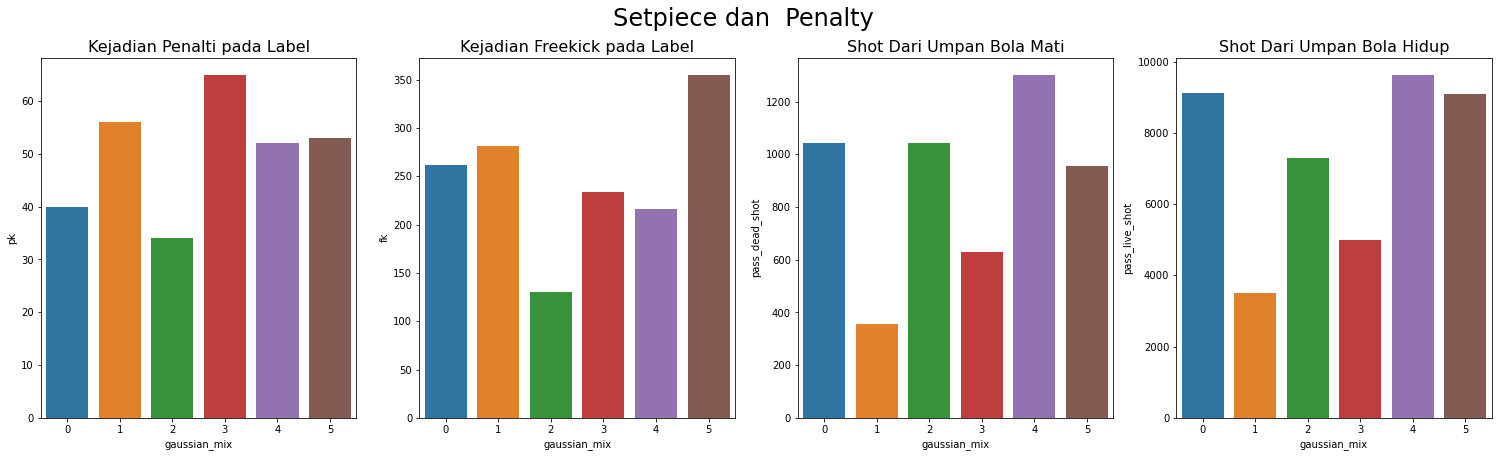

In [ ]:
judul = 'Peluang'

fig,ax = plt.subplots(ncols=4,figsize=(26,7))
fig.suptitle(judul,fontsize=24, y=.94)
fig.subplots_adjust(top=.84)
fig.subplots_adjust(hspace=.6)

sns.barplot( data=df_final,x='gaussian_mix',y='pk',estimator=sum,ax=ax[0],ci=None)
ax[0].set_title('Kejadian Penalti pada Label',fontsize= 16)

sns.barplot(data=df_final,x='gaussian_mix',y='fk',estimator=sum,ax=ax[1],ci=None)
ax[1].set_title('Kejadian Freekick pada Label',fontsize= 16)

sns.barplot(data=df_final,x='gaussian_mix',y='pass_dead_shot',ax=ax[2],ci=None)
ax[2].set_title('Umpan Bola Mati yang terlibat',fontsize= 16)

sns.barplot(data=df_final,x='gaussian_mix',y='pass_live_shot',estimator=sum,ax=ax[3],ci=None)
ax[3].set_title('Umpan Bola Hidup terlibat',fontsize= 16)

Jika Dilihat dari permainan banyak **tendangan bebas** ada pada **label 0** dan pada jumlah tendangan **penalti**, **label 2** menjadi yang **paling banyak** mendapatkan penalty.

namun dari keterlibatan **umpan bola mati** yang menciptakan tendangan / shot adalah **label 1**

## Hasil Akhir

Melihat keterlibatan **hasil akhir** atau menang, kalah, dan seri pada label dalam suatu pertandingan bola.

In [ ]:
# memilih data dengan label masing-masing dan hitung jumlah hasil akhir
df_0 = df_final.query("gaussian_mix == 0").value_counts('result')
df_1 = df_final.query("gaussian_mix == 1").value_counts('result')
df_2 = df_final.query("gaussian_mix == 2").value_counts('result')
df_3 = df_final.query("gaussian_mix == 3").value_counts('result')
df_4 = df_final.query("gaussian_mix == 4").value_counts('result')
df_5 = df_final.query("gaussian_mix == 5").value_counts('result')

Text(0.5, 1.0, 'result yang memiliki label 5')

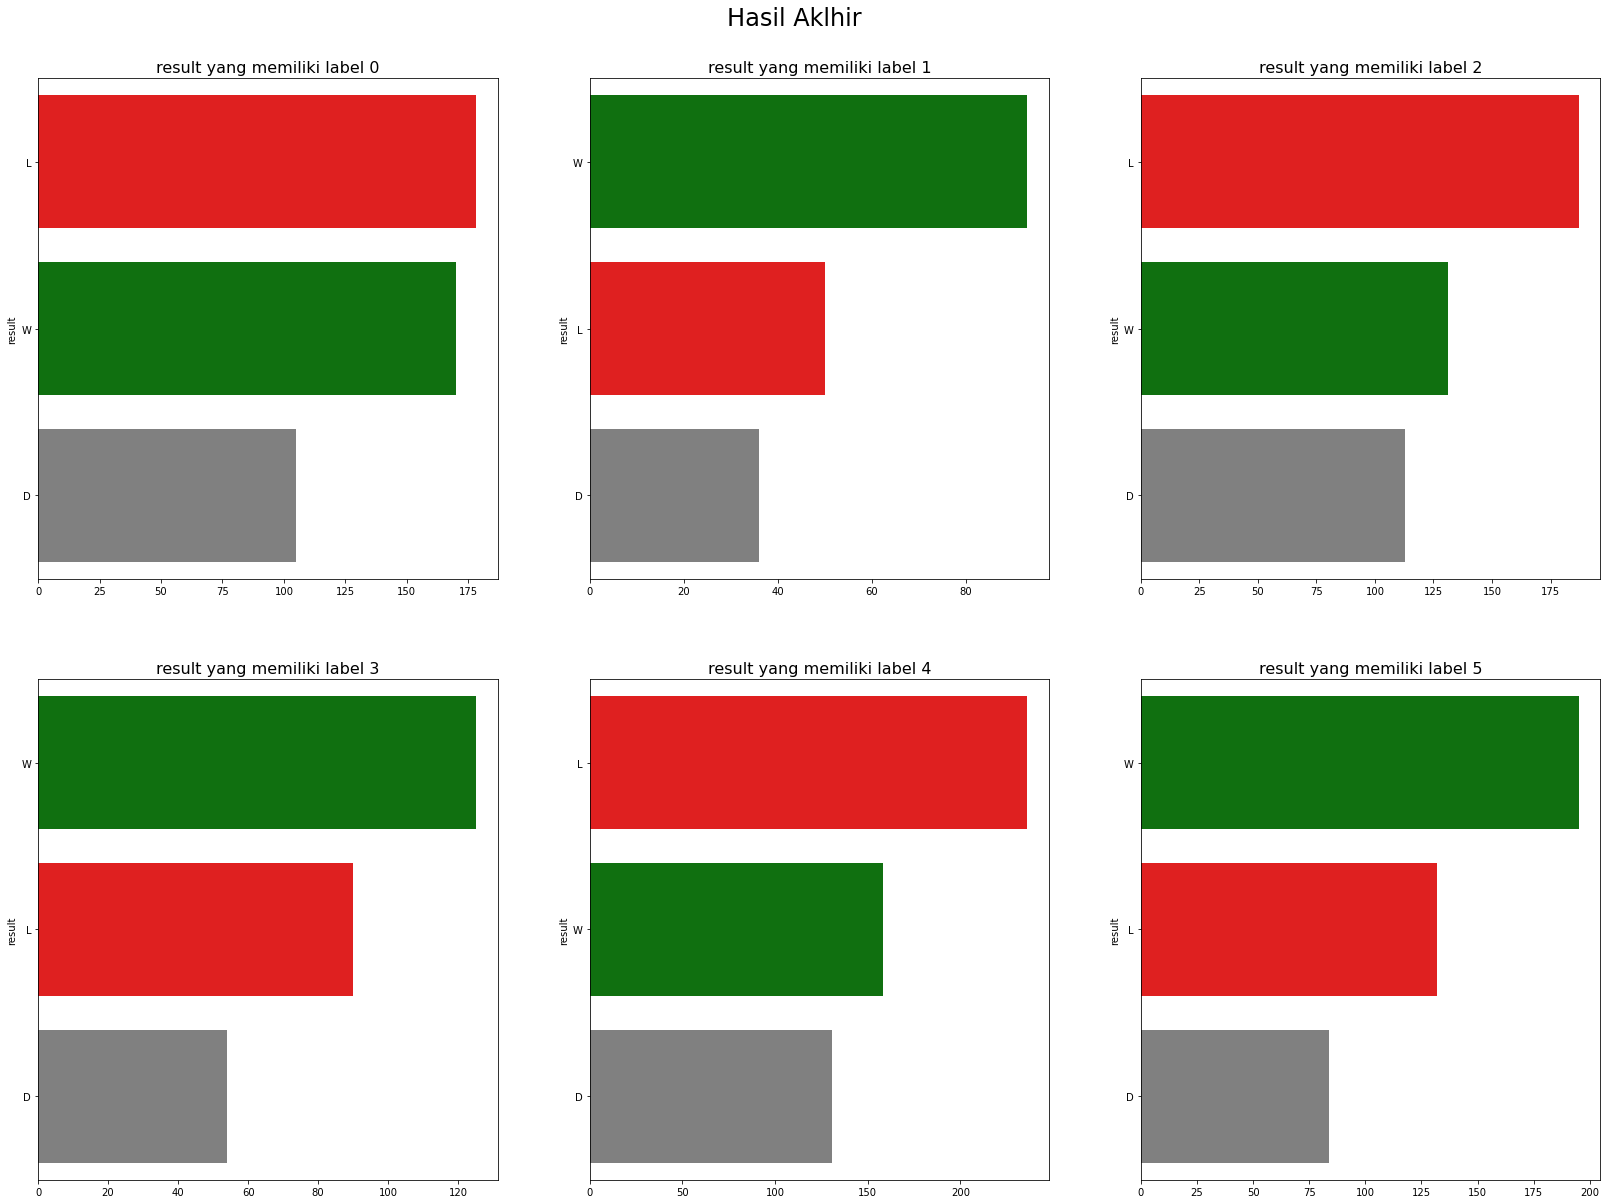

In [ ]:
judul = 'Hasil Aklhir'
palette_result = {"L":"r","W":"g","D":"grey"}
# tampilkan visualisasi pada masing-masing label dan team
fig,ax = plt.subplots( nrows=2,ncols=3,figsize=(28,20))
fig.suptitle(judul,fontsize=24, y=.94)
fig.subplots_adjust(top=.89)
fig.subplots_adjust(hspace=.2)

sns.barplot(y=df_0.index,x=df_0,ax=ax[0,0],ci=None,palette=palette_result)
ax[0,0].set_title('result yang memiliki label 0',fontsize= 16)

sns.barplot(y=df_1.index,x=df_1,ax=ax[0,1],ci=None,palette=palette_result)
ax[0,1].set_title('result yang memiliki label 1',fontsize= 16)

sns.barplot(y=df_2.index,x=df_2,ax=ax[0,2],ci=None,palette=palette_result)
ax[0,2].set_title('result yang memiliki label 2',fontsize= 16)

sns.barplot(y=df_3.index,x=df_3,ax=ax[1,0],ci=None,palette=palette_result)
ax[1,0].set_title('result yang memiliki label 3',fontsize= 16)

sns.barplot(y=df_4.index,x=df_4,ax=ax[1,1],ci=None,palette=palette_result)
ax[1,1].set_title('result yang memiliki label 4',fontsize= 16)

sns.barplot(y=df_5.index,x=df_5,ax=ax[1,2],ci=None,palette=palette_result)
ax[1,2].set_title('result yang memiliki label 5',fontsize= 16)



terlihat *kemungkinan untuk menang lebih besar* pada label 0, 2, dan 3. jika kita lihat pada **label 0 dan 3** maka terlihat sangat **wajar** karena didalam label tersebut terdapat **banyak** team **big 6**, namun pada **label 2** terlihat lebih banyak terdapan team papan tengah seperti **Brighton ,Everton dan Leicester City**. 

## Penamaan Label

jika dilihat pada EDA lanjutan diputuskan untuk memberi nama pada label hasil dari ***clustering Gaussian Mixture***, nama label sebagai berikut,

- **Label 0** = **Under-Performed** karena berdasarkan jumlah sentuhan bola masih termasuk kecil, bermain cukup progresif, lumayan banyak membuat peluang pada permainan setplay, namun memiliki rasio mnang kalah yang tipis.

- **Label 1** = **Mendominasi** karena berdasarkan jumlah sentuhan, merupakan yang paling banyak, cukup mendapatkan peluang dari penalti dan tendangan bebas, dan rasio kemenangan paling tinggi.


- **Label 3** = **Lucky Play** karena berdasarkan pressingnya yang kecil, jumlah **sentuhan** **lebih banyak sedikit** dari **label 0** dan peluang/tendangan relatif sedikit, namun **sering mendapatkan tendangan penalti** dan rasio kemenangan lebih tinggi <br>

- **Label 2** =  **Kurang Efektif** karena mendapatkan banyak peluang pada setplay dan setpiece namun malah menghasilkan rasio kekalahan yang lebih besar. <br>



- **Label 4** = **Terdominasi** karena berdasarkan jumlah sentuhan sangat sedikit, bermain terlalu progresif , memiliki rasio kekalahan yang lebih banyak.



- **Label 5** = **Efektif**  karenakan dari **jumlah sentuhan bola tidak terlalu banyak**, namun mendapatkan jumlah **peluang/tendangan yang bagus**, dan memiliki rasio menang yang lebih besar.


## Masukan Nama Label Pada Dataframe

penamaan label akan menggunakan akronim dimana,
- **Label 0** = **Efektif**
- **Label 1** =  **Kurang Efektif**
- **Label 2** = **Lucky Play**
- **Label 3** = **Mendominasi**
- **Label 4** = **Terdominasi**
- **Label 5** = **Under-Performed**

In [ ]:
# konvert dari label menuju nama servis pinjaman
def label_permainan(label):
    if label['gaussian_mix'] == 0:
        return 'Efektif'
    elif label['gaussian_mix']  == 1:
        return 'Kurang Efektif'
    elif label['gaussian_mix']  == 2:
        return 'Lucky Play'
    elif label['gaussian_mix']  == 3:
        return 'Mendominasi'
    elif label['gaussian_mix']  == 4:
        return 'Terdominasi'
    elif label['gaussian_mix']  == 5:
        return 'Under-Performed'
    else:
        return 'unknown'

Tambah Kolom `credit_service` untuk menampung naman servis pinjaman

In [ ]:
df_final['Permainan'] = df_final.apply(label_permainan,axis=1)

In [ ]:
df_final

,Unnamed: 0,result,formation,team,opponent,venue,date,pass_live_shot,pass_dead_shot,drib_shot,pk,fk,pass_prog,pass_prg_dist,pass_tot_dist,pass,ground,low,high,carries,carr_tot_dist,carr_prg_dist,carr_att_3rd,att_pen,press,press_succ,gaussian_mix,Permainan
0,0,W,3-4-3,Arsenal,Leicester City,Home,2017-08-11,39,4,2,0,0,36,2100,6264,319,513,30,116,360,2289,1154,109,16,474,126,4,Terdominasi
1,1,L,3-4-3,Arsenal,Stoke City,Away,2017-08-19,22,2,0,0,0,36,2304,7285,351,611,24,110,380,2014,956,118,22,152,46,4,Terdominasi
2,2,L,3-4-3,Arsenal,Liverpool,Away,2017-08-27,8,1,1,0,1,50,3193,8722,473,395,49,110,512,2976,1700,200,25,430,120,0,Efektif
3,3,W,3-4-3,Arsenal,Bournemouth,Home,2017-09-09,23,0,1,0,0,65,3543,10863,546,449,29,136,583,2305,1064,227,41,312,96,5,Under-Performed
4,4,D,3-4-3,Arsenal,Chelsea,Away,2017-09-17,12,0,1,0,1,50,3192,10302,533,351,29,152,526,2955,1355,177,25,374,62,0,Efektif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,2275,L,3-4-3,Wolves,Sheffield Utd,Away,2020-07-08,18,3,3,0,3,93,8787,29691,1407,996,345,414,1236,8304,4653,399,42,122,43,1,Kurang Efektif
2264,2276,W,3-4-3,Wolves,Everton,Home,2020-07-12,36,6,9,3,0,117,9015,32103,1530,1287,225,270,1368,7923,4656,453,48,144,22,1,Kurang Efektif
2265,2277,D,3-4-3,Wolves,Burnley,Away,2020-07-15,39,6,12,0,0,120,7167,21924,1026,687,261,420,912,6159,3894,441,66,121,39,1,Kurang Efektif
2266,2278,W,3-4-3,Wolves,Crystal Palace,Home,2020-07-20,33,6,6,0,0,87,8358,25200,1197,822,225,450,1119,5979,3072,438,57,152,44,1,Kurang Efektif


label terlihat sudah tepat pada sisi paling kanan data frame

# X. Model Inference

In [ ]:
pickup_inf.reset_index(drop=True,inplace=True)

## Data Preprocessing

data preprocessing is cloned from the data training and test preprocessing

### Missing Value

cek informasi data inference

In [ ]:
pickup_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      12 non-null     int64 
 1   result          12 non-null     object
 2   formation       12 non-null     object
 3   team            12 non-null     object
 4   opponent        12 non-null     object
 5   venue           12 non-null     object
 6   date            12 non-null     object
 7   pass_live_shot  12 non-null     int64 
 8   pass_dead_shot  12 non-null     int64 
 9   drib_shot       12 non-null     int64 
 10  pk              12 non-null     int64 
 11  fk              12 non-null     int64 
 12  pass_prog       12 non-null     int64 
 13  pass_prg_dist   12 non-null     int64 
 14  pass_tot_dist   12 non-null     int64 
 15  pass            12 non-null     int64 
 16  ground          12 non-null     int64 
 17  low             12 non-null     int64 
 18  high        

data inference tidak memiliki missing value

### Pilih Feature

pada pemilihan feature inference, harus sama dengan feature data Training

In [ ]:
selected_inf = pickup_inf.drop(drop_list,axis=1)

In [ ]:
selected_inf

,pass_live_shot,pass_dead_shot,drib_shot,pk,fk,pass_prog,pass_prg_dist,pass_tot_dist,ground,low,high,carries,carr_tot_dist,carr_prg_dist,att_pen,press,press_succ
0,30,0,4,0,0,20,1386,3063,636,130,182,160,1535,883,16,216,48
1,18,0,2,0,1,35,2554,7752,584,146,138,415,2986,1570,24,285,62
2,32,8,2,0,0,53,2961,7784,446,148,218,355,2740,1238,34,250,83
3,18,4,4,1,2,31,2452,7425,478,126,146,393,2449,1456,28,81,27
4,56,2,6,0,0,41,3594,14127,1300,184,204,710,5660,2434,32,120,31
5,10,3,0,0,0,80,4128,9676,147,43,114,460,2562,1342,30,178,44
6,26,2,5,1,1,54,3605,12186,568,62,109,581,2698,1486,40,258,82
7,9,1,0,0,0,30,1969,6359,206,19,141,388,2608,1326,8,113,40
8,14,0,3,0,2,98,4840,14308,414,51,120,712,4282,2170,42,126,44
9,12,8,0,0,0,24,1700,4296,296,142,266,264,1945,1047,29,271,71


In [ ]:
selected_inf.columns

Index(['pass_live_shot', 'pass_dead_shot', 'drib_shot', 'pk', 'fk',
       'pass_prog', 'pass_prg_dist', 'pass_tot_dist', 'ground', 'low', 'high',
       'carries', 'carr_tot_dist', 'carr_prg_dist', 'att_pen', 'press',
       'press_succ'],
      dtype='object')

## Clustering Data Inference

Menggunakan model **KMeans** yang telah dibuat dan di fit

In [ ]:
inf_label = gaussian_pipe.predict(selected_inf)

#### Hasil Clustering

hasil clustering dijadikan dataframe

In [ ]:
df_label_inf = pd.DataFrame(inf_label,columns=['gaussian_mix'])
df_label_inf

,gaussian_mix
0,4
1,0
2,4
3,4
4,4
5,2
6,0
7,2
8,1
9,4


gabungkan hasil clustering dan berikan nama product

In [ ]:
# concate between inference and clustering result

df_final_inf = pd.concat([pickup_inf,df_label_inf],axis=1)

df_final_inf['credit_service'] = df_final_inf.apply(label_permainan,axis=1)

In [ ]:
df_final_inf

,Unnamed: 0,result,formation,team,opponent,venue,date,pass_live_shot,pass_dead_shot,drib_shot,pk,fk,pass_prog,pass_prg_dist,pass_tot_dist,pass,ground,low,high,carries,carr_tot_dist,carr_prg_dist,carr_att_3rd,att_pen,press,press_succ,gaussian_mix,credit_service
0,1420,W,4-2-3-1,Manchester Utd,Tottenham,Home,2019-12-04,30,0,4,0,0,20,1386,3063,149,636,130,182,160,1535,883,72,16,216,48,4,Terdominasi
1,1081,L,4-1-4-1,Leicester City,Manchester City,Away,2019-12-21,18,0,2,0,1,35,2554,7752,364,584,146,138,415,2986,1570,198,24,285,62,0,Efektif
2,2184,L,4-2-3-1,West Ham,Leicester City,Home,2019-12-28,32,8,2,0,0,53,2961,7784,351,446,148,218,355,2740,1238,209,34,250,83,4,Terdominasi
3,1410,W,4-2-3-1,Manchester Utd,Leicester City,Home,2019-09-14,18,4,4,1,2,31,2452,7425,410,478,126,146,393,2449,1456,227,28,81,27,4,Terdominasi
4,1321,W,4-3-3,Manchester City,Burnley,Home,2020-06-22,56,2,6,0,0,41,3594,14127,684,1300,184,204,710,5660,2434,248,32,120,31,4,Terdominasi
5,1999,L,4-4-2,Watford,Tottenham,Away,2019-01-30,10,3,0,0,0,80,4128,9676,452,147,43,114,460,2562,1342,226,30,178,44,2,Lucky Play
6,1103,W,4-3-3,Liverpool,Crystal Palace,Home,2017-08-19,26,2,5,1,1,54,3605,12186,562,568,62,109,581,2698,1486,226,40,258,82,0,Efektif
7,953,D,5-4-1,Huddersfield,Everton,Away,2018-09-01,9,1,0,0,0,30,1969,6359,347,206,19,141,388,2608,1326,136,8,113,40,2,Lucky Play
8,822,L,4-1-4-1,Everton,Wolves,Home,2019-02-02,14,0,3,0,2,98,4840,14308,686,414,51,120,712,4282,2170,290,42,126,44,1,Kurang Efektif
9,250,L,4-3-3,Bournemouth,Norwich City,Away,2020-01-18,12,8,0,0,0,24,1700,4296,235,296,142,266,264,1945,1047,178,29,271,71,4,Terdominasi


In [ ]:
inf.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2280.0,1139.500000,658.323629,0.0,569.75,1139.5,1709.25,2279.0
pass_live_shot,2280.0,19.277632,13.718016,0.0,10.00,16.0,24.00,111.0
pass_dead_shot,2280.0,2.354386,2.361165,0.0,1.00,2.0,3.00,22.0
drib_shot,2280.0,1.740789,2.125278,0.0,0.00,1.0,2.00,18.0
pk,2280.0,0.132456,0.472127,0.0,0.00,0.0,0.00,6.0
fk,2280.0,0.651754,1.095183,0.0,0.00,0.0,1.00,12.0
pass_prog,2280.0,57.674123,31.566230,9.0,36.00,50.0,71.00,261.0
pass_prg_dist,2280.0,3570.250439,1717.113942,1085.0,2377.75,3008.0,4422.50,11943.0
pass_tot_dist,2280.0,10570.571491,6236.390401,2223.0,6313.50,8811.5,12923.00,46188.0
pass,2280.0,535.764474,320.813642,94.0,313.00,445.5,662.00,2400.0


# XI. Kesimpulan

Untuk mengignatkan objective dari project ini adalah membuat label dengan pendekatan **unsupervised** machinelearning **clustering**, dari data pola permainan dalam **setiap match sepakbola** England Premier League 2017 - 2020.

sebelum memulai pemodelan , dilakukan **ekplorasi** data atau **EDA** dimana ditemukan beberapa hal menarik, seperti pada pola permainan bola yang **sangat progresif** di dominasi oleh team **papan mengah kebawah**, namun **Liverpool** adalah satu-satu nya team big 6 yang dinilai bermain paling pregresif, sedangkan **Manchester city** bisa dibilang melakukan permainan **paling tidak progressif**.

jika dilihat dari team yang paling bekerja keras ditinjau dari **melakukan pressing**, **Norwich City dan Sheffield** United sangat sering melakukan pressing. namun yang **paling sukses** melkakukan pressing adalah **Liverpool dan Manchester city**.

dan team yang **paling mendapatkan kesempatan penalti dan tendangan bebas** adalah **Manchester United**.  Juga pada team yang mendapatkan penalti dan tendangan bebas relatif memiliki rasio kemenangan yang sedikit lebih unggul(jangan banyak-banyak). Dan team yang memiliki **rasio kemenangan tinggi** adalah team yang bermain setplay, dan menghasilkan tendangan ke gawang dengan umpan bola-bola hidup.

Pada clustering dari data ini, telah digunakan Gaussian Mixture untuk mendapatkan label, dimana label tersebut dinamakan dengan, 
- **Label 0** = **Efektif**
- **Label 1** =  **Lucky Play**
- **Label 2** = **Kurang Efektif**
- **Label 3** = **Mendominasi**
- **Label 4** = **Terdominasi**
- **Label 5** = **Under-Performed**

dimana penamaan label tersebut menggabungkan atribut pola permainan , keseringan melakukan tendangan dan hasil akhir permainan.


